# Program Code 


In [1]:
#Importing All The Required Libraries such as numpy, pandas, seaborn etc.

import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sb


from pylab import rcParams
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression

import scipy
from scipy.stats.stats import pearsonr

In [2]:
#Reading CSV File

df = pd.read_csv("Life Expectancy Data.csv")
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [3]:
#Checking Total Number Of Rows & Columns

print(f'The Life Expectancy Dataset has {df.shape[0]} ROWS and {df.shape[1]} COLUMNS')

The Life Expectancy Dataset has 2938 ROWS and 22 COLUMNS


In [4]:
#Getting All Information About The Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
#Data Cleaning

In [6]:
df.duplicated().sum()

0

In [7]:
# the date has no duplicates

In [8]:
#Checking for NULL Values in the Dataset with the help of isnull function

df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [9]:
df.shape #displaying total number of rows and columns.

(2938, 22)

In [10]:
#renaming columns inorder to access them
df.rename(columns = {
                       'Life expectancy ':'life_expectancy', 
                       'Adult Mortality':'adult_mortality', 
                       'infant deaths':'infant_deaths',
                       'percentage expenditure':'percentage_expenditure',
                       'Hepatitis B':'hepatitis_b',
                       ' BMI ':'BMI',
                       'Total expenditure':'total_expenditure',
                       ' HIV/AIDS':'hiv/aids',
                       'Income composition of resources':'HDI',
                       'Diphtheria ':'Diphtheria',
                       ' thinness  1-19 years':'thinness_1_19_years',
                       ' thinness 5-9 years':'thinness_5_9_years'
                       }, inplace = True)

In [11]:
# handling all columns with missing data one by one

In [12]:
df[df['life_expectancy'].isnull()]

Country  Year      Status  life_expectancy  \
624            Cook Islands  2013  Developing              NaN   
769                Dominica  2013  Developing              NaN   
1650       Marshall Islands  2013  Developing              NaN   
1715                 Monaco  2013  Developing              NaN   
1812                  Nauru  2013  Developing              NaN   
1909                   Niue  2013  Developing              NaN   
1958                  Palau  2013  Developing              NaN   
2167  Saint Kitts and Nevis  2013  Developing              NaN   
2216             San Marino  2013  Developing              NaN   
2713                 Tuvalu  2013  Developing              NaN   

      adult_mortality  infant_deaths  Alcohol  percentage_expenditure  \
624               NaN              0     0.01                0.000000   
769               NaN              0     0.01               11.419555   
1650              NaN              0     0.01              871.878317   
1715              NaN              0     0.01                0.000000   
1812              NaN              0     0.01               15.606596   
1909              NaN              0     0.01                0.000000   
1958              NaN              0      NaN              344.690631   
2167              NaN              0     8.54                0.000000   
2216              NaN              0     0.01                0.000000   
2713              NaN              0     0.01               78.281203   

      hepatitis_b  Measles   ...  Polio  total_expenditure  Diphtheria  \
624          98.0         0  ...   98.0               3.58        98.0   
769          96.0         0  ...   96.0               5.58        96.0   
1650          8.0         0  ...   79.0              17.24        79.0   
1715         99.0         0  ...   99.0               4.30        99.0   
1812         87.0         0  ...   87.0               4.65        87.0   
1909         99.0         0  ...   99.0               7.20        99.0   
1958         99.0         0  ...   99.0               9.27        99.0   
2167         97.0         0  ...   96.0               6.14        96.0   
2216         69.0         0  ...   69.0               6.50        69.0   
2713          9.0         0  ...    9.0              16.61         9.0   

      hiv/aids          GDP  Population  thinness_1_19_years  \
624        0.1          NaN         NaN                  0.1   
769        0.1   722.756650         NaN                  2.7   
1650       0.1  3617.752354         NaN                  0.1   
1715       0.1          NaN         NaN                  NaN   
1812       0.1   136.183210         NaN                  0.1   
1909       0.1          NaN         NaN                  0.1   
1958       0.1  1932.122370       292.0                  0.1   
2167       0.1          NaN         NaN                  3.7   
2216       0.1          NaN         NaN                  NaN   
2713       0.1  3542.135890      1819.0                  0.2   

      thinness_5_9_years    HDI  Schooling  
624                  0.1    NaN        NaN  
769                  2.6  0.721       12.7  
1650                 0.1    NaN        0.0  
1715                 NaN    NaN        NaN  
1812                 0.1    NaN        9.6  
1909                 0.1    NaN        NaN  
1958                 0.1  0.779       14.2  
2167                 3.6  0.749       13.4  
2216                 NaN    NaN       15.1  
2713                 0.1    NaN        0.0  

[10 rows x 22 columns]

As we can see that the country with missing Life Expectancy, have data missing for only year 2013.

Soo we can append these elments with mean of developing countries, as all of them are developing.
However, these countries have many missing values and hence were dropped entirely.

As the same 10 countries have Adult mortality data missing as well, it was best to drop them.

In [13]:
df.drop(df[df['life_expectancy'].isnull()].index, inplace = True)

In [14]:
df[df['Alcohol'].isnull()]

Country  Year      Status  life_expectancy  \
32                               Algeria  2015  Developing             75.6   
48                                Angola  2015  Developing             52.4   
64                   Antigua and Barbuda  2015  Developing             76.4   
80                             Argentina  2015  Developing             76.3   
96                               Armenia  2015  Developing             74.8   
...                                  ...   ...         ...              ...   
2858  Venezuela (Bolivarian Republic of)  2015  Developing             74.1   
2874                            Viet Nam  2015  Developing             76.0   
2890                               Yemen  2015  Developing             65.7   
2906                              Zambia  2015  Developing             61.8   
2922                            Zimbabwe  2015  Developing             67.0   

      adult_mortality  infant_deaths  Alcohol  percentage_expenditure  \
32               19.0             21      NaN                     0.0   
48              335.0             66      NaN                     0.0   
64               13.0              0      NaN                     0.0   
80              116.0              8      NaN                     0.0   
96              118.0              1      NaN                     0.0   
...               ...            ...      ...                     ...   
2858            157.0              9      NaN                     0.0   
2874            127.0             28      NaN                     0.0   
2890            224.0             37      NaN                     0.0   
2906             33.0             27      NaN                     0.0   
2922            336.0             22      NaN                     0.0   

      hepatitis_b  Measles   ...  Polio  total_expenditure  Diphtheria  \
32           95.0        63  ...   95.0                NaN        95.0   
48           64.0       118  ...    7.0                NaN        64.0   
64           99.0         0  ...   86.0                NaN        99.0   
80           94.0         0  ...   93.0                NaN        94.0   
96           94.0        33  ...   96.0                NaN        94.0   
...           ...       ...  ...    ...                ...         ...   
2858         87.0         0  ...   87.0                NaN        87.0   
2874         97.0       256  ...   97.0                NaN        97.0   
2890         69.0       468  ...   63.0                NaN        69.0   
2906          9.0         9  ...    9.0                NaN         9.0   
2922         87.0         0  ...   88.0                NaN        87.0   

      hiv/aids           GDP  Population  thinness_1_19_years  \
32         0.1   4132.762920  39871528.0                  6.0   
48         1.9   3695.793748   2785935.0                  8.3   
64         0.2  13566.954100         NaN                  3.3   
80         0.1  13467.123600  43417765.0                  1.0   
96         0.1    369.654776    291695.0                  2.1   
...        ...           ...         ...                  ...   
2858       0.1           NaN         NaN                  1.6   
2874       0.1           NaN         NaN                 14.2   
2890       0.1           NaN         NaN                 13.6   
2906       4.1   1313.889646    161587.0                  6.3   
2922       6.2    118.693830  15777451.0                  5.6   

      thinness_5_9_years    HDI  Schooling  
32                   5.8  0.743       14.4  
48                   8.2  0.531       11.4  
64                   3.3  0.784       13.9  
80                   0.9  0.826       17.3  
96                   2.2  0.741       12.7  
...                  ...    ...        ...  
2858                 1.5  0.769       14.3  
2874                14.5  0.678       12.6  
2890                13.4  0.499        9.0  
2906                 6.1  0.576       12.5  
2922                 5.5  0.507       10.3

In [15]:
#All the values missing are of the year 2015, hence we can backfill these values

df.loc[:,'Alcohol'] = df.loc[:,'Alcohol'].bfill()

In [16]:
df[(df['hepatitis_b'].isnull())]

Country  Year      Status  life_expectancy  adult_mortality  \
44    Algeria  2003  Developing             71.7            146.0   
45    Algeria  2002  Developing             71.6            145.0   
46    Algeria  2001  Developing             71.4            145.0   
47    Algeria  2000  Developing             71.3            145.0   
57     Angola  2006  Developing             47.7            381.0   
...       ...   ...         ...              ...              ...   
2917   Zambia  2004  Developing             47.9            578.0   
2918   Zambia  2003  Developing             46.4             64.0   
2919   Zambia  2002  Developing             45.5             69.0   
2920   Zambia  2001  Developing             44.6            611.0   
2921   Zambia  2000  Developing             43.8            614.0   

      infant_deaths  Alcohol  percentage_expenditure  hepatitis_b  Measles   \
44               20     0.34               25.018523          NaN     15374   
45               20     0.36              148.511984          NaN      5862   
46               20     0.23              147.986071          NaN      2686   
47               21     0.25              154.455944          NaN         0   
57               90     5.84               25.086888          NaN       765   
...             ...      ...                     ...          ...       ...   
2917             36     2.46                8.369852          NaN        35   
2918             39     2.33               65.789974          NaN       881   
2919             41     2.44               54.043480          NaN     25036   
2920             43     2.61               46.830275          NaN     16997   
2921             44     2.62               45.616880          NaN     30930   

      ...  Polio  total_expenditure  Diphtheria  hiv/aids          GDP  \
44    ...   87.0               3.60        87.0       0.1   294.335560   
45    ...   86.0               3.73        86.0       0.1  1774.336730   
46    ...   89.0               3.84        89.0       0.1  1732.857979   
47    ...   86.0               3.49        86.0       0.1  1757.177970   
57    ...   36.0               4.54        34.0       2.5   262.415149   
...   ...    ...                ...         ...       ...          ...   
2917  ...   84.0               7.33        83.0      17.6    53.277222   
2918  ...   85.0               8.18        83.0      18.2   429.158343   
2919  ...   85.0               6.93        84.0      18.4   377.135244   
2920  ...   86.0               6.56        85.0      18.6   378.273624   
2921  ...   85.0               7.16        85.0      18.7   341.955625   

      Population  thinness_1_19_years  thinness_5_9_years    HDI  Schooling  
44     3243514.0                  6.3                 6.1  0.663       11.5  
45     3199546.0                  6.3                 6.2  0.653       11.1  
46    31592153.0                  6.4                 6.3  0.644       10.9  
47     3118366.0                  6.5                 6.4  0.636       10.7  
57     2262399.0                  9.8                 9.7  0.439        7.2  
...          ...                  ...                 ...    ...        ...  
2917  11731746.0                  7.2                 7.1  0.456       10.5  
2918  11421984.0                  7.3                 7.2  0.443       10.2  
2919    111249.0                  7.4                 7.3  0.433       10.0  
2920   1824125.0                  7.4                 7.4  0.424        9.8  
2921   1531221.0                  7.5                 7.5  0.418        9.6  

[553 rows x 22 columns]

By observing data, we can see that its a mix of values from developed and developing countires

for developed countries data for all years was missing hence meean of other developed countires is calculated and added here.
In case of developing countires, front fill was used to fill gaps for a particular country. 

In [17]:
hb_mean = df[df['Status']=='Developed'].mean(skipna=True, numeric_only=True).hepatitis_b

developed_list = [
    'United Kingdom of Great Britain and Northern Ireland',
    'Switzerland',
    'Slovenia',
    'Norway',
    'Japan',
    'Iceland',
    'Hungary',
    'Finland',
    'Denmark']

country_index = []
for c in developed_list:
    country_index.append(df[df['Country'] == c].index)
    
for i in country_index:
    for j in i:
        df.at[j, 'hepatitis_b'] = hb_mean

        

df.loc[:,'hepatitis_b'] = df.loc[:,'hepatitis_b'].ffill()

In [18]:
df[(df['BMI'].isnull())]

Country  Year      Status  life_expectancy  adult_mortality  \
2409  South Sudan  2015  Developing             57.3            332.0   
2410  South Sudan  2014  Developing             56.6            343.0   
2411  South Sudan  2013  Developing             56.4            345.0   
2412  South Sudan  2012  Developing             56.0            347.0   
2413  South Sudan  2011  Developing             55.4            355.0   
2414  South Sudan  2010  Developing             55.0            359.0   
2415  South Sudan  2009  Developing             54.3            369.0   
2416  South Sudan  2008  Developing             53.6            377.0   
2417  South Sudan  2007  Developing             53.1            381.0   
2418  South Sudan  2006  Developing             52.5            383.0   
2419  South Sudan  2005  Developing             51.9            383.0   
2420  South Sudan  2004  Developing             51.4            383.0   
2421  South Sudan  2003  Developing             58.0            383.0   
2422  South Sudan  2002  Developing             52.0            382.0   
2423  South Sudan  2001  Developing             49.6            381.0   
2424  South Sudan  2000  Developing             48.9             38.0   
2457        Sudan  2015  Developing             64.1            225.0   
2458        Sudan  2014  Developing             63.8            229.0   
2459        Sudan  2013  Developing             63.5            232.0   
2460        Sudan  2012  Developing             63.2            235.0   
2461        Sudan  2011  Developing             62.7            241.0   
2462        Sudan  2010  Developing             62.5            243.0   
2463        Sudan  2009  Developing             62.0            248.0   
2464        Sudan  2008  Developing             61.8            251.0   
2465        Sudan  2007  Developing             61.4            254.0   
2466        Sudan  2006  Developing             61.0             26.0   
2467        Sudan  2005  Developing             67.0            261.0   
2468        Sudan  2004  Developing             59.7            278.0   
2469        Sudan  2003  Developing             59.6            278.0   
2470        Sudan  2002  Developing             59.4            277.0   
2471        Sudan  2001  Developing             58.9            283.0   
2472        Sudan  2000  Developing             58.6            284.0   

      infant_deaths  Alcohol  percentage_expenditure  hepatitis_b  Measles   \
2409             26     0.01                0.000000         31.0       878   
2410             26     0.01               46.074469         31.0       441   
2411             26     0.01               47.444530         31.0       525   
2412             26     0.01               38.338232         31.0      1952   
2413             27     0.01                0.000000         31.0      1256   
2414             27     0.01                0.000000         31.0         0   
2415             27     0.01                0.000000         31.0         0   
2416             27     0.01                0.000000         31.0         0   
2417             27     0.01                0.000000         31.0         0   
2418             28     0.01                0.000000         31.0         0   
2419             28     0.01                0.000000         31.0         0   
2420             29     0.01                0.000000         31.0         0   
2421             29     0.01                0.000000         31.0         0   
2422             30     0.01                0.000000         31.0         0   
2423             30     0.01                0.000000         31.0         0   
2424             31     0.01                0.000000         31.0         0   
2457             58     0.01                0.000000         93.0      3585   
2458             59     0.01              253.608651         94.0       676   
2459             60     0.01              227.835321         93.0      2813   
2460             61 

In [19]:
#BMI has many issues like outliers and missing data so it was dropped
df.drop('BMI', axis=1, inplace=True)

In [20]:
df[(df['Polio'].isnull())]

Country  Year      Status  life_expectancy  adult_mortality  \
1742   Montenegro  2005  Developing             73.6            133.0   
1743   Montenegro  2004  Developing             73.5            134.0   
1744   Montenegro  2003  Developing             73.5            134.0   
1745   Montenegro  2002  Developing             73.4            136.0   
1746   Montenegro  2001  Developing             73.3            136.0   
1747   Montenegro  2000  Developing             73.0            144.0   
2414  South Sudan  2010  Developing             55.0            359.0   
2415  South Sudan  2009  Developing             54.3            369.0   
2416  South Sudan  2008  Developing             53.6            377.0   
2417  South Sudan  2007  Developing             53.1            381.0   
2418  South Sudan  2006  Developing             52.5            383.0   
2419  South Sudan  2005  Developing             51.9            383.0   
2420  South Sudan  2004  Developing             51.4            383.0   
2421  South Sudan  2003  Developing             58.0            383.0   
2422  South Sudan  2002  Developing             52.0            382.0   
2423  South Sudan  2001  Developing             49.6            381.0   
2424  South Sudan  2000  Developing             48.9             38.0   
2615  Timor-Leste  2001  Developing             59.4            269.0   
2616  Timor-Leste  2000  Developing             58.7            276.0   

      infant_deaths  Alcohol  percentage_expenditure  hepatitis_b  Measles   \
1742              0     0.01              527.307672          9.0         0   
1743              0     0.01               57.121901          9.0         0   
1744              0     0.01              495.078296          9.0         0   
1745              0     0.01               36.480240          9.0         0   
1746              0     0.01               33.669814          9.0         0   
1747              0     0.01              274.547260          9.0         0   
2414             27     0.01                0.000000         31.0         0   
2415             27     0.01                0.000000         31.0         0   
2416             27     0.01                0.000000         31.0         0   
2417             27     0.01                0.000000         31.0         0   
2418             28     0.01                0.000000         31.0         0   
2419             28     0.01                0.000000         31.0         0   
2420             29     0.01                0.000000         31.0         0   
2421             29     0.01                0.000000         31.0         0   
2422             30     0.01                0.000000         31.0         0   
2423             30     0.01                0.000000         31.0         0   
2424             31     0.01                0.000000         31.0         0   
2615              3     0.50                6.556583         79.0         0   
2616              3     0.50               49.069672         79.0         0   

      ...  Polio  total_expenditure  Diphtheria  hiv/aids          GDP  \
1742  ...    NaN               8.46         NaN       0.1  3674.617924   
1743  ...    NaN               8.45         NaN       0.1   338.199535   
1744  ...    NaN               8.91         NaN       0.1  2789.173500   
1745  ...    NaN               8.33         NaN       0.1   216.243274   
1746  ...    NaN               8.23         NaN       0.1   199.583957   
1747  ...    NaN               7.32         NaN       0.1  1627.428930   
2414  ...    NaN                NaN         NaN       4.0  1562.239346   
2415  ...    NaN                NaN         NaN       4.2  1264.789980   
2416  ...    NaN                NaN         NaN       4.2  1678.711862   
2417  ...    NaN                NaN         NaN       4.2          NaN   
2418  ...    NaN                NaN         NaN       4.1          NaN   
2419  ...    NaN                NaN         NaN       3.9          NaN   
2420  

In [21]:
#front_fill
df.loc[:,'Polio'] = df.loc[:,'Polio'].ffill()

In [22]:
df[(df['total_expenditure'].isnull())]

Country  Year      Status  life_expectancy  \
32                               Algeria  2015  Developing             75.6   
48                                Angola  2015  Developing             52.4   
64                   Antigua and Barbuda  2015  Developing             76.4   
80                             Argentina  2015  Developing             76.3   
96                               Armenia  2015  Developing             74.8   
...                                  ...   ...         ...              ...   
2858  Venezuela (Bolivarian Republic of)  2015  Developing             74.1   
2874                            Viet Nam  2015  Developing             76.0   
2890                               Yemen  2015  Developing             65.7   
2906                              Zambia  2015  Developing             61.8   
2922                            Zimbabwe  2015  Developing             67.0   

      adult_mortality  infant_deaths  Alcohol  percentage_expenditure  \
32               19.0             21     0.01                     0.0   
48              335.0             66     8.33                     0.0   
64               13.0              0     8.56                     0.0   
80              116.0              8     7.93                     0.0   
96              118.0              1     3.91                     0.0   
...               ...            ...      ...                     ...   
2858            157.0              9     6.47                     0.0   
2874            127.0             28     4.09                     0.0   
2890            224.0             37     0.01                     0.0   
2906             33.0             27     0.01                     0.0   
2922            336.0             22     6.50                     0.0   

      hepatitis_b  Measles   ...  Polio  total_expenditure  Diphtheria  \
32           95.0        63  ...   95.0                NaN        95.0   
48           64.0       118  ...    7.0                NaN        64.0   
64           99.0         0  ...   86.0                NaN        99.0   
80           94.0         0  ...   93.0                NaN        94.0   
96           94.0        33  ...   96.0                NaN        94.0   
...           ...       ...  ...    ...                ...         ...   
2858         87.0         0  ...   87.0                NaN        87.0   
2874         97.0       256  ...   97.0                NaN        97.0   
2890         69.0       468  ...   63.0                NaN        69.0   
2906          9.0         9  ...    9.0                NaN         9.0   
2922         87.0         0  ...   88.0                NaN        87.0   

      hiv/aids           GDP  Population  thinness_1_19_years  \
32         0.1   4132.762920  39871528.0                  6.0   
48         1.9   3695.793748   2785935.0                  8.3   
64         0.2  13566.954100         NaN                  3.3   
80         0.1  13467.123600  43417765.0                  1.0   
96         0.1    369.654776    291695.0                  2.1   
...        ...           ...         ...                  ...   
2858       0.1           NaN         NaN                  1.6   
2874       0.1           NaN         NaN                 14.2   
2890       0.1           NaN         NaN                 13.6   
2906       4.1   1313.889646    161587.0                  6.3   
2922       6.2    118.693830  15777451.0                  5.6   

      thinness_5_9_years    HDI  Schooling  
32                   5.8  0.743       14.4  
48                   8.2  0.531       11.4  
64                   3.3  0.784       13.9  
80                   0.9  0.826       17.3  
96                   2.2  0.741       12.7  
...                  ...    ...        ...  
2858                 1.5  0.769       14.3  
2874                14.5  0.678       12.6  
2890                13.4  0.499        9.0  
2906                 6.1  0.576       12.5  
2922                 5.5  0.507       10.3

Two countries i.e "Democratic People's Republic of Korea" and "Somalia", have missing data for all the years and hence they weree filled using mean of developing countires.

As for rest, they miss data only for 2015, so we use back_fill

In [23]:
te_mean = df[df['Status']=='Developing'].mean(skipna=True, numeric_only=True).total_expenditure

list_developed = [
    "Democratic People's Republic of Korea", 
    'Somalia']

country_index = []
for c in list_developed:
    country_index.append(df[df['Country'] == c].index)
    
for i in country_index:
    for j in i:
        df.at[j, 'total_expenditure'] = te_mean

In [24]:
column = ['total_expenditure']
df.loc[:,'total_expenditure'] = df.loc[:,'total_expenditure'].bfill()

In [25]:
df[df['Diphtheria'].isnull()]

Country  Year      Status  life_expectancy  adult_mortality  \
1742   Montenegro  2005  Developing             73.6            133.0   
1743   Montenegro  2004  Developing             73.5            134.0   
1744   Montenegro  2003  Developing             73.5            134.0   
1745   Montenegro  2002  Developing             73.4            136.0   
1746   Montenegro  2001  Developing             73.3            136.0   
1747   Montenegro  2000  Developing             73.0            144.0   
2414  South Sudan  2010  Developing             55.0            359.0   
2415  South Sudan  2009  Developing             54.3            369.0   
2416  South Sudan  2008  Developing             53.6            377.0   
2417  South Sudan  2007  Developing             53.1            381.0   
2418  South Sudan  2006  Developing             52.5            383.0   
2419  South Sudan  2005  Developing             51.9            383.0   
2420  South Sudan  2004  Developing             51.4            383.0   
2421  South Sudan  2003  Developing             58.0            383.0   
2422  South Sudan  2002  Developing             52.0            382.0   
2423  South Sudan  2001  Developing             49.6            381.0   
2424  South Sudan  2000  Developing             48.9             38.0   
2615  Timor-Leste  2001  Developing             59.4            269.0   
2616  Timor-Leste  2000  Developing             58.7            276.0   

      infant_deaths  Alcohol  percentage_expenditure  hepatitis_b  Measles   \
1742              0     0.01              527.307672          9.0         0   
1743              0     0.01               57.121901          9.0         0   
1744              0     0.01              495.078296          9.0         0   
1745              0     0.01               36.480240          9.0         0   
1746              0     0.01               33.669814          9.0         0   
1747              0     0.01              274.547260          9.0         0   
2414             27     0.01                0.000000         31.0         0   
2415             27     0.01                0.000000         31.0         0   
2416             27     0.01                0.000000         31.0         0   
2417             27     0.01                0.000000         31.0         0   
2418             28     0.01                0.000000         31.0         0   
2419             28     0.01                0.000000         31.0         0   
2420             29     0.01                0.000000         31.0         0   
2421             29     0.01                0.000000         31.0         0   
2422             30     0.01                0.000000         31.0         0   
2423             30     0.01                0.000000         31.0         0   
2424             31     0.01                0.000000         31.0         0   
2615              3     0.50                6.556583         79.0         0   
2616              3     0.50               49.069672         79.0         0   

      ...  Polio  total_expenditure  Diphtheria  hiv/aids          GDP  \
1742  ...    9.0               8.46         NaN       0.1  3674.617924   
1743  ...    9.0               8.45         NaN       0.1   338.199535   
1744  ...    9.0               8.91         NaN       0.1  2789.173500   
1745  ...    9.0               8.33         NaN       0.1   216.243274   
1746  ...    9.0               8.23         NaN       0.1   199.583957   
1747  ...    9.0               7.32         NaN       0.1  1627.428930   
2414  ...   66.0               9.30         NaN       4.0  1562.239346   
2415  ...   66.0               9.30         NaN       4.2  1264.789980   
2416  ...   66.0               9.30         NaN       4.2  1678.711862   
2417  ...   66.0               9.30         NaN       4.2          NaN   
2418  ...   66.0               9.30         NaN       4.1          NaN   
2419  ...   66.0               9.30         NaN       3.9          NaN   
2420  

In [26]:
#front_fill
df.loc[:,'Diphtheria'] = df.loc[:,'Diphtheria'].ffill()

In [27]:
df[(df['GDP'].isnull())]

Country  Year      Status  life_expectancy  adult_mortality  \
160   Bahamas  2015  Developing             76.1            147.0   
161   Bahamas  2014  Developing             75.4             16.0   
162   Bahamas  2013  Developing             74.8            172.0   
163   Bahamas  2012  Developing             74.9            167.0   
164   Bahamas  2011  Developing             75.0            162.0   
...       ...   ...         ...              ...              ...   
2901    Yemen  2004  Developing             62.2            247.0   
2902    Yemen  2003  Developing             61.9            249.0   
2903    Yemen  2002  Developing             61.5             25.0   
2904    Yemen  2001  Developing             61.1            251.0   
2905    Yemen  2000  Developing             68.0            252.0   

      infant_deaths  Alcohol  percentage_expenditure  hepatitis_b  Measles   \
160               0     9.45                     0.0         95.0         0   
161               0     9.45                     0.0         96.0         0   
162               0     9.42                     0.0         97.0         0   
163               0     9.50                     0.0         96.0         0   
164               0     9.34                     0.0         95.0         0   
...             ...      ...                     ...          ...       ...   
2901             42     0.06                     0.0         43.0     12708   
2902             43     0.04                     0.0         38.0      8536   
2903             45     0.07                     0.0         31.0       890   
2904             46     0.08                     0.0         19.0       485   
2905             48     0.07                     0.0         14.0         0   

      ...  Polio  total_expenditure  Diphtheria  hiv/aids  GDP  Population  \
160   ...   95.0               7.74        95.0       0.1  NaN         NaN   
161   ...   96.0               7.74        96.0       0.1  NaN         NaN   
162   ...   97.0               7.50        97.0       0.1  NaN         NaN   
163   ...   99.0               7.43        98.0       0.2  NaN         NaN   
164   ...   97.0               7.63        98.0       0.1  NaN         NaN   
...   ...    ...                ...         ...       ...  ...         ...   
2901  ...   72.0               4.90        72.0       0.1  NaN         NaN   
2902  ...   61.0               5.00        61.0       0.1  NaN         NaN   
2903  ...   64.0               4.22        65.0       0.1  NaN         NaN   
2904  ...   73.0               4.34        73.0       0.1  NaN         NaN   
2905  ...   74.0               4.14        74.0       0.1  NaN         NaN   

      thinness_1_19_years  thinness_5_9_years    HDI  Schooling  
160                   2.5                 2.5  0.790       12.6  
161                   2.5                 2.5  0.789       12.6  
162                   2.5                 2.5  0.790       12.6  
163                   2.5                 2.5  0.789       12.6  
164                   2.5                 2.5  0.788       12.6  
...                   ...                 ...    ...        ...  
2901                 13.9                13.9  0.464        8.4  
2902                 14.0                13.9  0.457        8.2  
2903                 14.0                14.0  0.450        8.0  
2904                 14.0                14.0  0.444        7.9  
2905                 14.1                14.1  0.436        7.7  

[443 rows x 21 columns]

In [28]:
#individually adding mean data for developd and developing countries
country_index = df[(df['GDP'].isnull())].index

ding_gdp_mean = df[df['Status']=='Developing'].mean(skipna=True, numeric_only=True).GDP
dped_gdp_mean = df[df['Status']=='Developed'].mean(skipna=True, numeric_only=True).GDP

for i in country_index:
    if df['Status'][i] == 'Developed':
        df.at[i, 'GDP'] = dped_gdp_mean
    if df['Status'][i] == 'Developing':
        df.at[i, 'GDP'] = ding_gdp_mean

In [29]:
df[(df['Population'].isnull())]

Country  Year      Status  life_expectancy  adult_mortality  \
64    Antigua and Barbuda  2015  Developing             76.4             13.0   
65    Antigua and Barbuda  2014  Developing             76.2            131.0   
66    Antigua and Barbuda  2013  Developing             76.1            133.0   
67    Antigua and Barbuda  2012  Developing             75.9            134.0   
68    Antigua and Barbuda  2011  Developing             75.7            136.0   
...                   ...   ...         ...              ...              ...   
2901                Yemen  2004  Developing             62.2            247.0   
2902                Yemen  2003  Developing             61.9            249.0   
2903                Yemen  2002  Developing             61.5             25.0   
2904                Yemen  2001  Developing             61.1            251.0   
2905                Yemen  2000  Developing             68.0            252.0   

      infant_deaths  Alcohol  percentage_expenditure  hepatitis_b  Measles   \
64                0     8.56                0.000000         99.0         0   
65                0     8.56             2422.999774         99.0         0   
66                0     8.58             1991.430372         99.0         0   
67                0     8.18             2156.229842         98.0         0   
68                0     7.84             1810.875316         99.0         0   
...             ...      ...                     ...          ...       ...   
2901             42     0.06                0.000000         43.0     12708   
2902             43     0.04                0.000000         38.0      8536   
2903             45     0.07                0.000000         31.0       890   
2904             46     0.08                0.000000         19.0       485   
2905             48     0.07                0.000000         14.0         0   

      ...  Polio  total_expenditure  Diphtheria  hiv/aids          GDP  \
64    ...   86.0               5.54        99.0       0.2  13566.95410   
65    ...   96.0               5.54        99.0       0.2  12888.29667   
66    ...   98.0               5.33        99.0       0.2  12224.86416   
67    ...   97.0               5.39        98.0       0.2  12565.44197   
68    ...   99.0               5.65        99.0       0.1  11929.34991   
...   ...    ...                ...         ...       ...          ...   
2901  ...   72.0               4.90        72.0       0.1   4292.19269   
2902  ...   61.0               5.00        61.0       0.1   4292.19269   
2903  ...   64.0               4.22        65.0       0.1   4292.19269   
2904  ...   73.0               4.34        73.0       0.1   4292.19269   
2905  ...   74.0               4.14        74.0       0.1   4292.19269   

      Population  thinness_1_19_years  thinness_5_9_years    HDI  Schooling  
64           NaN                  3.3                 3.3  0.784       13.9  
65           NaN                  3.3                 3.3  0.782       13.9  
66           NaN                  3.3                 3.3  0.781       13.9  
67           NaN                  3.3                 3.3  0.778       13.8  
68           NaN                  3.3                 3.3  0.782       14.1  
...          ...                  ...                 ...    ...        ...  
2901         NaN                 13.9                13.9  0.464        8.4  
2902         NaN                 14.0                13.9  0.457        8.2  
2903         NaN                 14.0                14.0  0.450        8.0  
2904         NaN                 14.0                14.0  0.444        7.9  
2905         NaN                 14.1                14.1  0.436        7.7  

[644 rows x 21 columns]

In [30]:
# this column has the highest missing values and it is not very significant as seen in the corellation matrix. hence dropped
df.drop('Population', axis=1, inplace=True)

In [31]:
df[(df['Schooling'].isnull())]

Country  Year      Status  life_expectancy  \
432              Côte d'Ivoire  2015  Developing             53.3   
433              Côte d'Ivoire  2014  Developing             52.8   
434              Côte d'Ivoire  2013  Developing             52.3   
435              Côte d'Ivoire  2012  Developing             52.0   
436              Côte d'Ivoire  2011  Developing             51.7   
...                        ...   ...         ...              ...   
2805  United States of America  2004   Developed             77.5   
2806  United States of America  2003   Developed             77.2   
2807  United States of America  2002   Developed             77.0   
2808  United States of America  2001   Developed             76.9   
2809  United States of America  2000   Developed             76.8   

      adult_mortality  infant_deaths  Alcohol  percentage_expenditure  \
432             397.0             57     0.01                     0.0   
433              47.0             58     0.01                     0.0   
434             412.0             59     3.15                     0.0   
435             415.0             59     3.24                     0.0   
436             419.0             60     3.13                     0.0   
...               ...            ...      ...                     ...   
2805            111.0             28     8.48                     0.0   
2806            114.0             28     8.40                     0.0   
2807            115.0             28     8.33                     0.0   
2808            115.0             28     8.25                     0.0   
2809            114.0             28     8.21                     0.0   

      hepatitis_b  Measles   under-five deaths   Polio  total_expenditure  \
432          83.0        65                  79   81.0               5.72   
433          76.0        50                  80   76.0               5.72   
434           8.0        48                  81   79.0               5.81   
435          82.0       137                  82   83.0               6.14   
436          62.0       628                  83   58.0               6.42   
...           ...       ...                 ...    ...                ...   
2805         92.0        37                  33   92.0              15.14   
2806         92.0        56                  33   91.0              15.60   
2807         88.0        41                  33    9.0              14.55   
2808         89.0       116                  33   89.0              13.73   
2809          9.0        85                  33    9.0              13.70   

      Diphtheria  hiv/aids           GDP  thinness_1_19_years  \
432         83.0       1.9   4292.192690                  5.5   
433         76.0       2.0   4292.192690                  5.6   
434          8.0       2.4   4292.192690                  5.8   
435         82.0       2.9   4292.192690                  5.9   
436         62.0       3.3   4292.192690                  6.1   
...          ...       ...           ...                  ...   
2805        96.0       0.1  22053.386446                  0.7   
2806        96.0       0.1  22053.386446                  0.7   
2807        94.0       0.1  22053.386446                  0.8   
2808        94.0       0.1  22053.386446                  0.8   
2809        94.0       0.1  22053.386446                  0.8   

      thinness_5_9_years  HDI  Schooling  
432                  5.5  NaN        NaN  
433                  5.6  NaN        NaN  
434                  5.7  NaN        NaN  
435                  5.9  NaN        NaN  
436                  6.0  NaN        NaN  
...                  ...  ...        ...  
2805                 0.6  NaN        NaN  
2806                 0.6  NaN        NaN  
2807                 0.6  NaN        NaN  
2808                 0.6  NaN        NaN  
2809                 0.7  NaN        NaN  

[160 rows x 20 columns]

In [32]:
#similar to previous cases
country_index = df[(df['Schooling'].isnull())].index

dping_schl_mean = df[df['Status']=='Developing'].mean(skipna=True, numeric_only=True).Schooling
dped_schl_mean = df[df['Status']=='Developed'].mean(skipna=True, numeric_only=True).Schooling

for i in country_index:
    if df['Status'][i] == 'Developed':
        df.at[i, 'Schooling'] = dped_schl_mean
    if df['Status'][i] == 'Developing':
        df.at[i, 'Schooling'] = dping_schl_mean

In [33]:
df[(df['HDI'].isnull())]

Country  Year      Status  life_expectancy  \
432              Côte d'Ivoire  2015  Developing             53.3   
433              Côte d'Ivoire  2014  Developing             52.8   
434              Côte d'Ivoire  2013  Developing             52.3   
435              Côte d'Ivoire  2012  Developing             52.0   
436              Côte d'Ivoire  2011  Developing             51.7   
...                        ...   ...         ...              ...   
2805  United States of America  2004   Developed             77.5   
2806  United States of America  2003   Developed             77.2   
2807  United States of America  2002   Developed             77.0   
2808  United States of America  2001   Developed             76.9   
2809  United States of America  2000   Developed             76.8   

      adult_mortality  infant_deaths  Alcohol  percentage_expenditure  \
432             397.0             57     0.01                     0.0   
433              47.0             58     0.01                     0.0   
434             412.0             59     3.15                     0.0   
435             415.0             59     3.24                     0.0   
436             419.0             60     3.13                     0.0   
...               ...            ...      ...                     ...   
2805            111.0             28     8.48                     0.0   
2806            114.0             28     8.40                     0.0   
2807            115.0             28     8.33                     0.0   
2808            115.0             28     8.25                     0.0   
2809            114.0             28     8.21                     0.0   

      hepatitis_b  Measles   under-five deaths   Polio  total_expenditure  \
432          83.0        65                  79   81.0               5.72   
433          76.0        50                  80   76.0               5.72   
434           8.0        48                  81   79.0               5.81   
435          82.0       137                  82   83.0               6.14   
436          62.0       628                  83   58.0               6.42   
...           ...       ...                 ...    ...                ...   
2805         92.0        37                  33   92.0              15.14   
2806         92.0        56                  33   91.0              15.60   
2807         88.0        41                  33    9.0              14.55   
2808         89.0       116                  33   89.0              13.73   
2809          9.0        85                  33    9.0              13.70   

      Diphtheria  hiv/aids           GDP  thinness_1_19_years  \
432         83.0       1.9   4292.192690                  5.5   
433         76.0       2.0   4292.192690                  5.6   
434          8.0       2.4   4292.192690                  5.8   
435         82.0       2.9   4292.192690                  5.9   
436         62.0       3.3   4292.192690                  6.1   
...          ...       ...           ...                  ...   
2805        96.0       0.1  22053.386446                  0.7   
2806        96.0       0.1  22053.386446                  0.7   
2807        94.0       0.1  22053.386446                  0.8   
2808        94.0       0.1  22053.386446                  0.8   
2809        94.0       0.1  22053.386446                  0.8   

      thinness_5_9_years  HDI  Schooling  
432                  5.5  NaN  11.225130  
433                  5.6  NaN  11.225130  
434                  5.7  NaN  11.225130  
435                  5.9  NaN  11.225130  
436                  6.0  NaN  11.225130  
...                  ...  ...        ...  
2805                 0.6  NaN  15.845474  
2806                 0.6  NaN  15.845474  
2807                 0.6  NaN  15.845474  
2808                 0.6  NaN  15.845474  
2809                 0.7  NaN  15.845474  

[160 rows x 20 columns]

In [34]:
#similar to previous cases
country_index = df[(df['HDI'].isnull())].index

dping_HDI_mean = df[df['Status']=='Developing'].mean(skipna=True, numeric_only=True).HDI
dped_HDI_mean = df[df['Status']=='Developed'].mean(skipna=True, numeric_only=True).HDI

for i in country_index:
    if df['Status'][i] == 'Developed':
        df.at[i, 'HDI'] = dped_HDI_mean
    if df['Status'][i] == 'Developing':
        df.at[i, 'HDI'] = dping_HDI_mean

In [35]:
#dropping these columns as corellation matrix valu with life expctancy is very less
df.drop('thinness_1_19_years', axis=1, inplace=True)
df.drop('thinness_5_9_years', axis=1, inplace=True)

In [36]:
#All null values are removed from the dataset

In [37]:
df_numeric = df.select_dtypes(include='number')

column_numeric = df_numeric.columns.drop('Year')

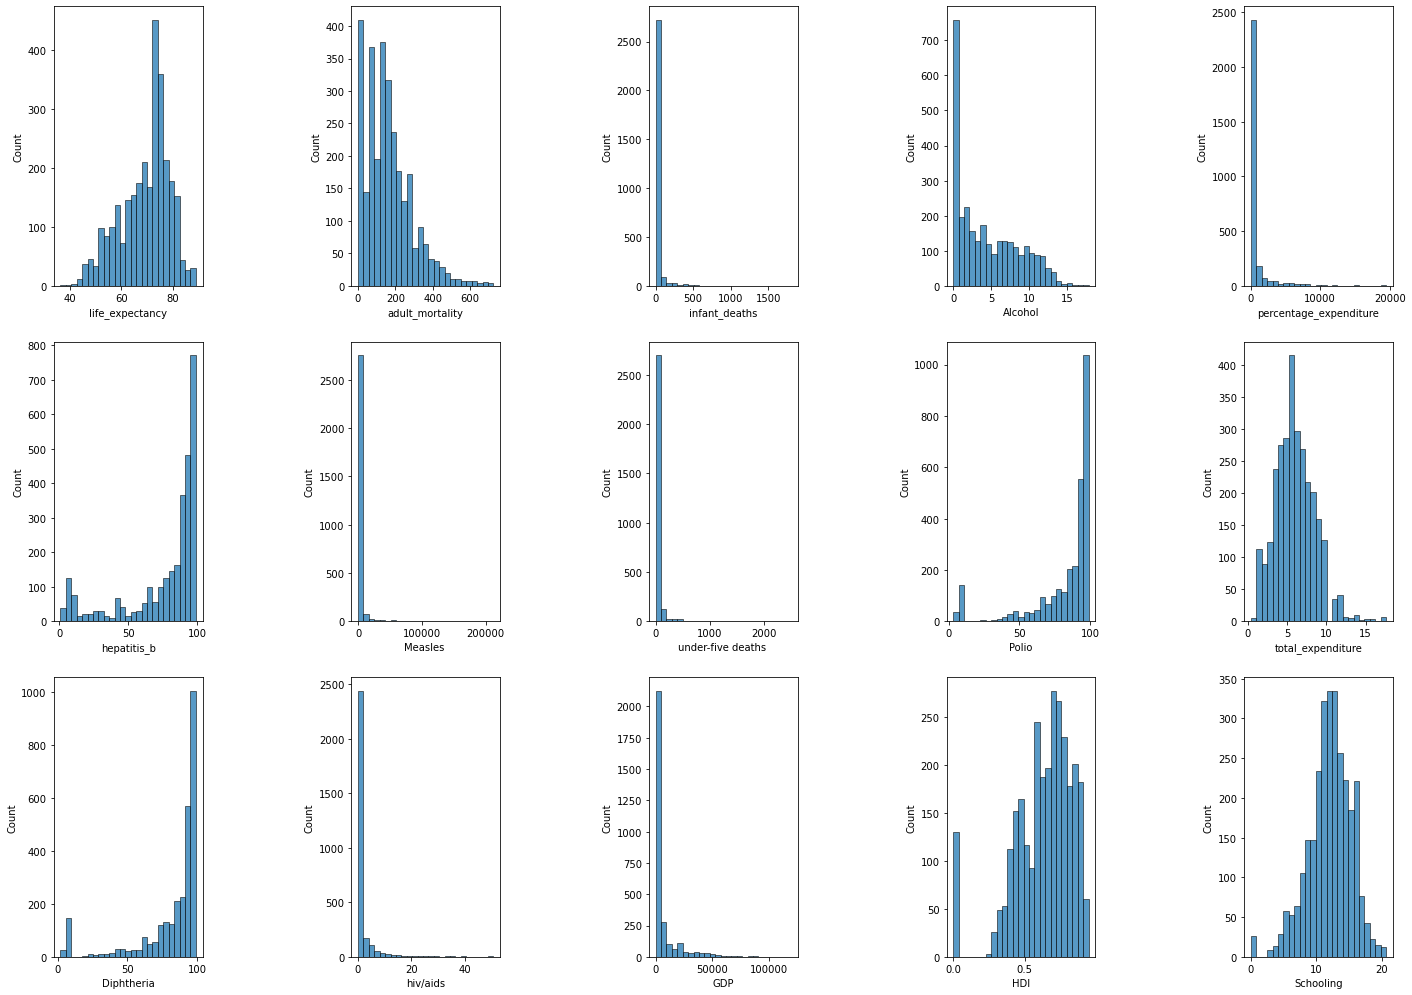

In [38]:
#Box plot for all th columns used
plt.figure(figsize=(24,36))
plt.subplots_adjust(wspace=1, hspace=None)

i = 1
for c in column_numeric:
    plt.subplot(6,5,i)
    sb.histplot(data = df[c],  bins = 25)
    i +=1

### Outliers

In [39]:
df.skew(axis = 0, numeric_only=True)

Year                      0.000000
life_expectancy          -0.638605
adult_mortality           1.174369
infant_deaths             9.771044
Alcohol                   0.606698
percentage_expenditure    4.643790
hepatitis_b              -1.484136
Measles                   9.425290
under-five deaths         9.479623
Polio                    -2.066216
total_expenditure         0.575889
Diphtheria               -2.039281
hiv/aids                  5.386623
GDP                       3.352330
HDI                      -1.145458
Schooling                -0.583533
dtype: float64

The best way to deal with skewness and outliers is Box Transformation.

However the data can't be 0

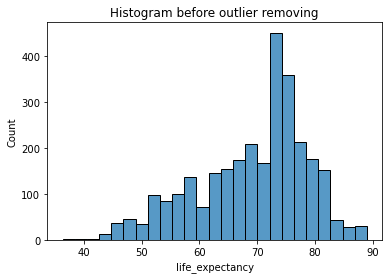

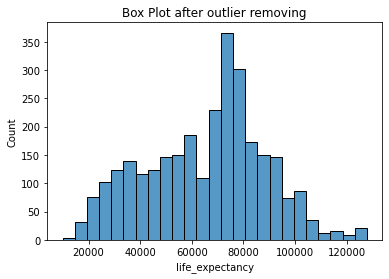

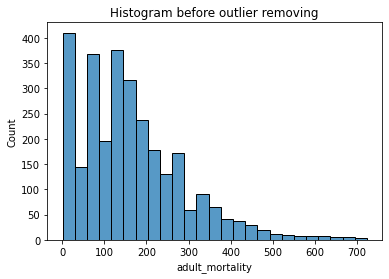

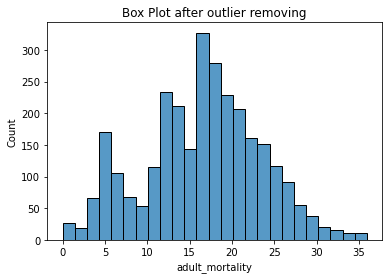

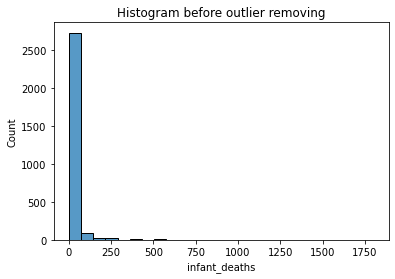

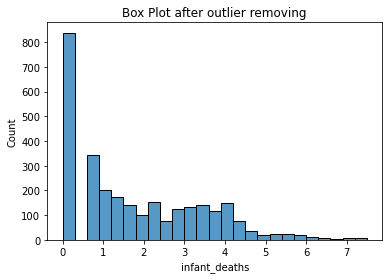

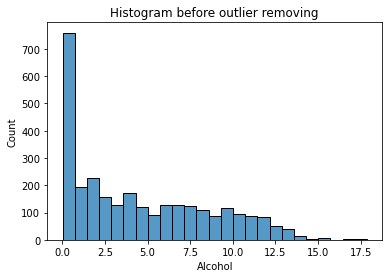

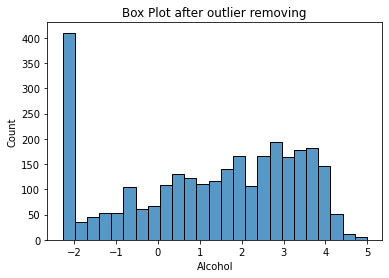

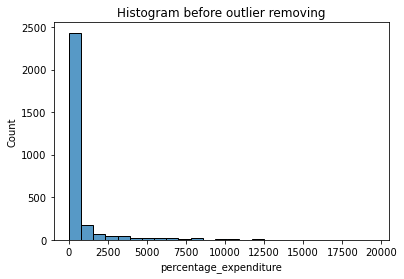

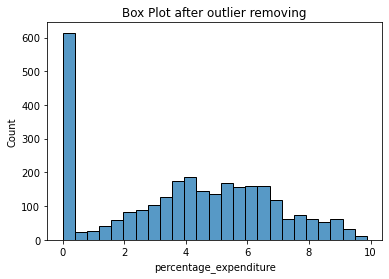

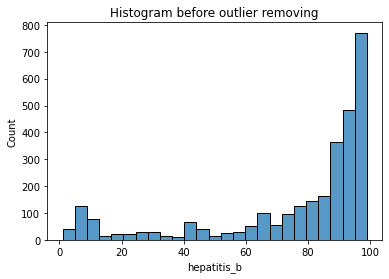

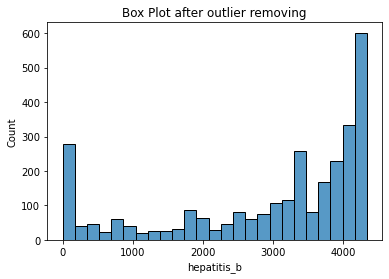

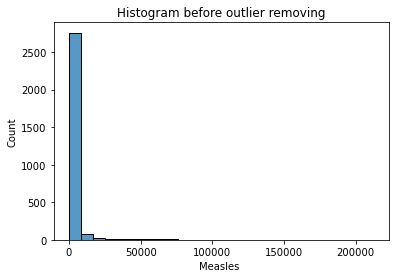

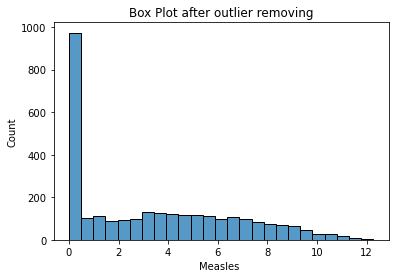

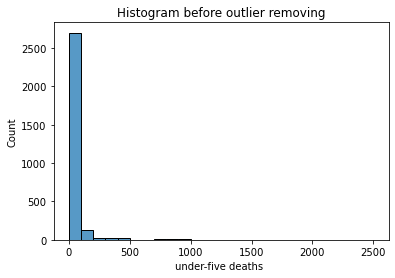

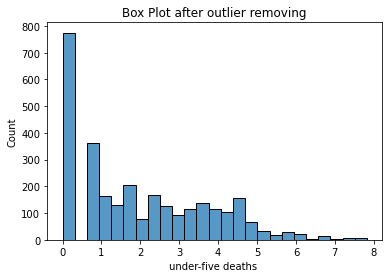

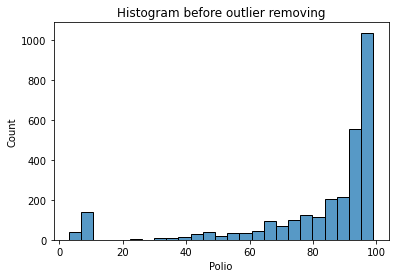

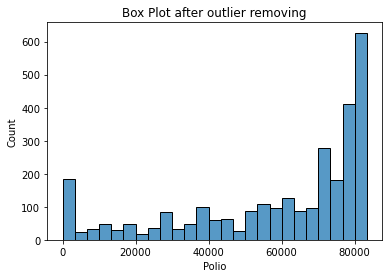

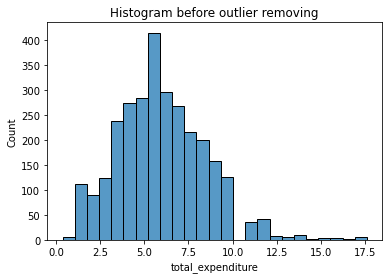

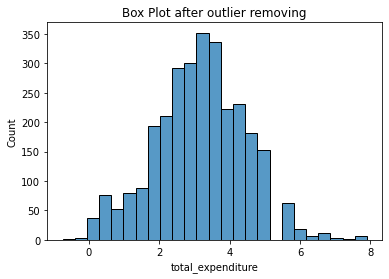

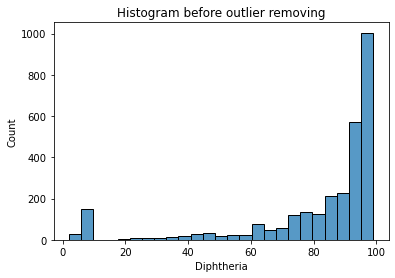

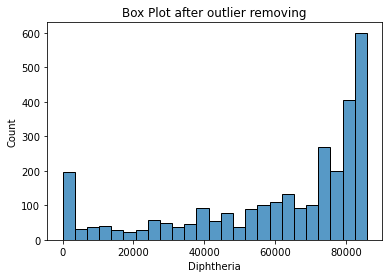

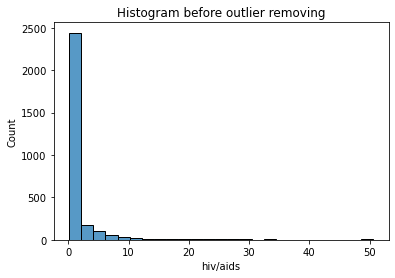

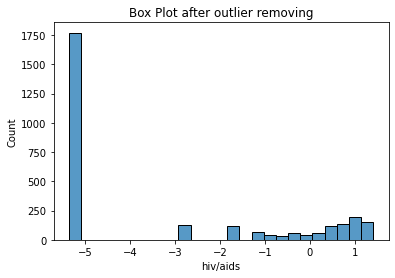

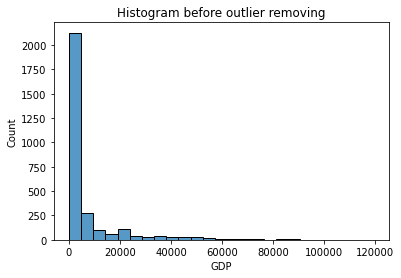

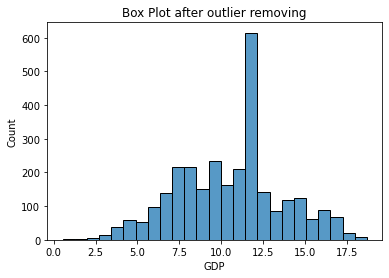

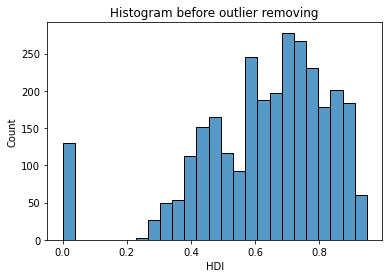

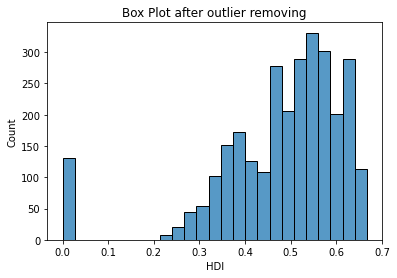

In [40]:
import scipy
df_out=df.copy()

for c in df_out.columns.drop(['Country','Status','Year','Schooling']):
    #print(column)
    sb.histplot(data = df_out[c],  bins = 25)
    plt.title("Histogram before outlier removing")
    plt.show()
    if ((df_out[c].min()>0)):
        df_out[c],fitted_lambda= scipy.stats.boxcox(df_out[c] ,lmbda=None)
    else:# using log(1+x) transformation
        df_out[c] = df_out[c] + 1
        df_out[c] = np.log(df_out[c])
    sb.histplot(data = df_out[c],  bins = 25)
    plt.title("Box Plot after outlier removing")
    plt.show()

In [41]:
df.isnull().sum()

Country                   0
Year                      0
Status                    0
life_expectancy           0
adult_mortality           0
infant_deaths             0
Alcohol                   0
percentage_expenditure    0
hepatitis_b               0
Measles                   0
under-five deaths         0
Polio                     0
total_expenditure         0
Diphtheria                0
hiv/aids                  0
GDP                       0
HDI                       0
Schooling                 0
dtype: int64

In [42]:
#An informative 3-D world map created using inbuilt library on WHO data for the year 2007(Its an interactive 3d globe)

In [43]:
country_data = px.data.gapminder()

In [44]:
map_fig = px.scatter_geo(country_data,
                         locations = 'iso_alpha',
                         projection = 'orthographic',
                         color = 'continent',
                         opacity = .8,
                         hover_name = 'country',
                         hover_data = ['lifeExp','pop', 'year']
)

map_fig.show()

In [45]:
#Heatmap
#creating a pearson coefficient correlation matrix

In [46]:
%matplotlib inline
rcParams['figure.figsize'] = 16,8

plt.style.use('seaborn-whitegrid')

In [47]:
corr = df.corr()
corr

Year  life_expectancy  adult_mortality  \
Year                    1.000000         0.170033        -0.079052   
life_expectancy         0.170033         1.000000        -0.696359   
adult_mortality        -0.079052        -0.696359         1.000000   
infant_deaths          -0.036464        -0.196557         0.078756   
Alcohol                -0.076661         0.408053        -0.204352   
percentage_expenditure  0.032723         0.381864        -0.242860   
hepatitis_b             0.236213         0.330208        -0.192221   
Measles                -0.081840        -0.157586         0.031176   
under-five deaths      -0.041980        -0.222529         0.094146   
Polio                   0.103324         0.460142        -0.273500   
total_expenditure       0.082303         0.212290        -0.112138   
Diphtheria              0.142635         0.474818        -0.274592   
hiv/aids               -0.138789        -0.556556         0.523821   
GDP                     0.092780         0.451944        -0.296748   
HDI                     0.233720         0.708915        -0.455276   
Schooling               0.204815         0.735217        -0.453172   

                        infant_deaths   Alcohol  percentage_expenditure  \
Year                        -0.036464 -0.076661                0.032723   
life_expectancy             -0.196557  0.408053                0.381864   
adult_mortality              0.078756 -0.204352               -0.242860   
infant_deaths                1.000000 -0.114083               -0.085906   
Alcohol                     -0.114083  1.000000                0.336359   
percentage_expenditure      -0.085906  0.336359                1.000000   
hepatitis_b                 -0.223719  0.122304                0.031152   
Measles                      0.501038 -0.048907               -0.056831   
under-five deaths            0.996628 -0.111350               -0.088152   
Polio                       -0.166995  0.232554                0.148875   
total_expenditure           -0.128386  0.293029                0.163619   
Diphtheria                  -0.171621  0.231200                0.145417   
hiv/aids                     0.024955 -0.049285               -0.098230   
GDP                         -0.109573  0.360328                0.875998   
HDI                         -0.147561  0.458189                0.373172   
Schooling                   -0.196808  0.546114                0.381345   

                        hepatitis_b  Measles   under-five deaths      Polio  \
Year                       0.236213 -0.081840           -0.041980  0.103324   
life_expectancy            0.330208 -0.157586           -0.222529  0.460142   
adult_mortality           -0.192221  0.031176            0.094146 -0.273500   
infant_deaths             -0.223719  0.501038            0.996628 -0.166995   
Alcohol                    0.122304 -0.048907           -0.111350  0.232554   
percentage_expenditure     0.031152 -0.056831           -0.088152  0.148875   
hepatitis_b                1.000000 -0.155677           -0.234855  0.490575   
Measles                   -0.155677  1.000000            0.507718 -0.132613   
under-five deaths         -0.234855  0.507718            1.000000 -0.184896   
Polio                      0.490575 -0.132613           -0.184896  1.000000   
total_expenditure          0.107535 -0.105682           -0.129860  0.138172   
Diphtheria                 0.588935 -0.138292           -0.191998  0.679621   
hiv/aids                  -0.132678  0.030673            0.037783 -0.156445   
GDP                        0.092791 -0.073845           -0.113326  0.205612   
HDI                        0.287082 -0.122620           -0.165748  0.379371   
Schooling                  0.306562 -0.130879           -0.212600  0.412640   

                        total_expenditure  Diphtheria  hiv/aids       GDP  \
Year                             0.082303    0.142635 -0.138789  0.092780   
life_expectancy                  0.212290    0.474818 -0.556556

<AxesSubplot:>

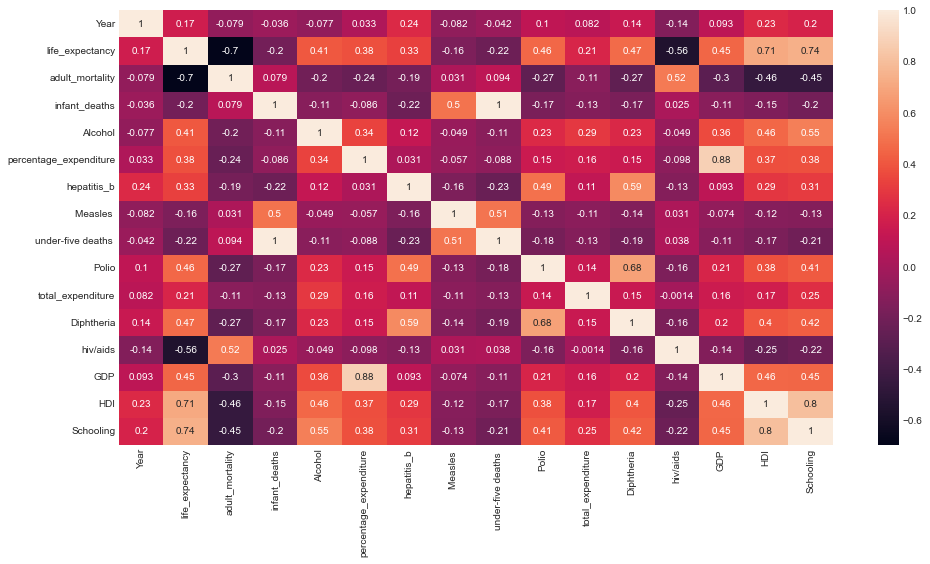

In [48]:
sb.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

#Displays the Heat Map which consists the corelation values.

In [49]:
#Country with lowest & Highest schooling and their life span

In [50]:
Least_schooling = df.groupby('Country').mean().nsmallest(10, ['Schooling']).reset_index() 
#Grouping the values by country and sorting to get the last ten values.

Highest_schooling = df.groupby('Country').mean().nlargest(10, ['Schooling']).reset_index() 
#Grouping the values by country and sorting to get the top ten values.



In [51]:
#Displaying country with highest schooling and their life span
display(Highest_schooling)


Country    Year  life_expectancy  adult_mortality  infant_deaths  \
0    Australia  2007.5         81.81250          63.1875           1.00   
1  New Zealand  2007.5         81.33750          71.5000           0.00   
2      Iceland  2007.5         82.44375          49.3750           0.00   
3      Ireland  2007.5         80.15000          72.4375           0.00   
4       Norway  2007.5         81.79375          66.2500           0.00   
5      Finland  2007.5         80.71250          68.8750           0.00   
6      Denmark  2007.5         79.25625          66.0625           0.00   
7  Netherlands  2007.5         81.13125          61.6250           1.00   
8      Belgium  2007.5         80.68125          70.1875           0.25   
9      Germany  2007.5         81.17500          71.2500           2.50   

     Alcohol  percentage_expenditure  hepatitis_b   Measles   \
0  10.127500             5332.226473    93.437500   103.9375   
1   9.166250             2922.147780    70.187500    94.9375   
2   7.465000             4991.595308    88.041298     0.0000   
3  12.535000             4867.312605    61.312500   174.5000   
4   6.234375             4658.813918    88.041298     6.3125   
5   9.505625             2889.315470    88.041298     2.8125   
6  10.641250             5313.335794    88.041298    15.7500   
7   8.294375             3805.687048    16.437500   251.9375   
8  11.140000             2392.432657    74.500000    81.5625   
9  11.591250             3900.890261    77.437500  1497.1875   

   under-five deaths     Polio  total_expenditure  Diphtheria  hiv/aids  \
0               1.375  86.7500           8.873125     86.8750       0.1   
1               0.000  89.1250           9.027500     70.6250       0.1   
2               0.000  89.7500           8.565625     89.7500       0.1   
3               0.000  86.1250           7.731875     86.1250       0.1   
4               0.000  93.0625           9.125625     87.9375       0.1   
5               0.000  97.1875           8.680625     98.2500       0.1   
6               0.000  88.0000           7.446250     88.0000       0.1   
7               1.000  96.8125           6.813750     96.8125       0.1   
8               1.000  97.7500           5.688750     97.3125       0.1   
9               3.250  94.8125           4.525000     89.8750       0.1   

            GDP       HDI  Schooling  
0  34637.565047  0.918125   20.03750  
1  14775.554807  0.891188   18.86875  
2  30159.502907  0.885313   18.15625  
3  33835.272005  0.891500   17.65625  
4  27434.946928  0.931438   17.46875  
5  25268.649758  0.872938   17.29375  
6  33067.407916  0.899875   17.19375  
7  34964.719797  0.899750   17.05625  
8  16915.306000  0.877750   16.78750  
9  24337.749100  0.894500   16.60000

In [52]:
#Displaying country with Lowest schooling and their life span
display(Least_schooling)

Country    Year  life_expectancy  adult_mortality  \
0               South Sudan  2007.5         53.87500         346.3125   
1                     Niger  2007.5         56.98125         232.4375   
2                  Djibouti  2007.5         60.75625         274.6875   
3                   Eritrea  2007.5         60.68750         308.6250   
4              Burkina Faso  2007.5         55.64375         252.5000   
5                      Chad  2007.5         50.38750         227.7500   
6  Central African Republic  2007.5         48.51250         333.0625   
7                     Sudan  2007.5         61.82500         240.3125   
8                      Mali  2007.5         54.93750         202.1250   
9                  Pakistan  2007.5         64.50000         154.0000   

   infant_deaths   Alcohol  percentage_expenditure  hepatitis_b    Measles   \
0        27.7500  0.010000                8.241077      31.0000    315.7500   
1        52.8125  0.086250               19.099369      66.4375  15467.1250   
2         1.4375  0.740000               98.838448      54.8125    113.8750   
3         6.3125  0.570625                6.436069      86.3750    175.0000   
4        44.7500  3.976875               52.045581      79.1875   5091.7500   
5        44.8750  0.386250               32.277320      23.4375   4687.7500   
6        16.5000  1.155000               40.905543      42.2500    699.4375   
7        64.6250  1.367500               97.698443      56.6250   3108.0000   
8        55.9375  0.411250               48.981177      69.3750    823.3125   
9       367.9375  0.025000               26.120391      66.5000   3842.3125   

   under-five deaths     Polio  total_expenditure  Diphtheria  hiv/aids  \
0             43.2500  59.1250           7.654375     56.6250   3.69375   
1            105.6875  52.9375           6.530000     52.3125   1.16250   
2              1.8750  74.8750           6.726875     75.1250   3.28125   
3              8.9375  87.8125           3.460625     82.2500   1.21250   
4             79.9375  69.0000           5.970625     77.3125   1.83750   
5             78.1250  32.8750           4.331875     26.8125   4.33750   
6             24.5000  41.3125           4.049375     42.4375   8.98125   
7             96.6250  72.2500           5.866250     72.3750   0.25000   
8             96.5000  62.5000           6.543750     67.0000   1.82500   
9            461.0000  64.1875           2.885625     70.8750   0.10000   

           GDP       HDI  Schooling  
0  2692.213160  0.131687    1.53125  
1   259.782441  0.298125    4.01875  
2   897.999871  0.418438    4.75000  
3  1267.594690  0.255312    4.92500  
4   410.372034  0.229687    5.40625  
5   484.791694  0.316625    6.08750  
6   363.055905  0.335500    6.23750  
7  1192.797953  0.441000    6.37500  
8   530.512170  0.365187    6.43125  
9   666.111052  0.500875    6.71875

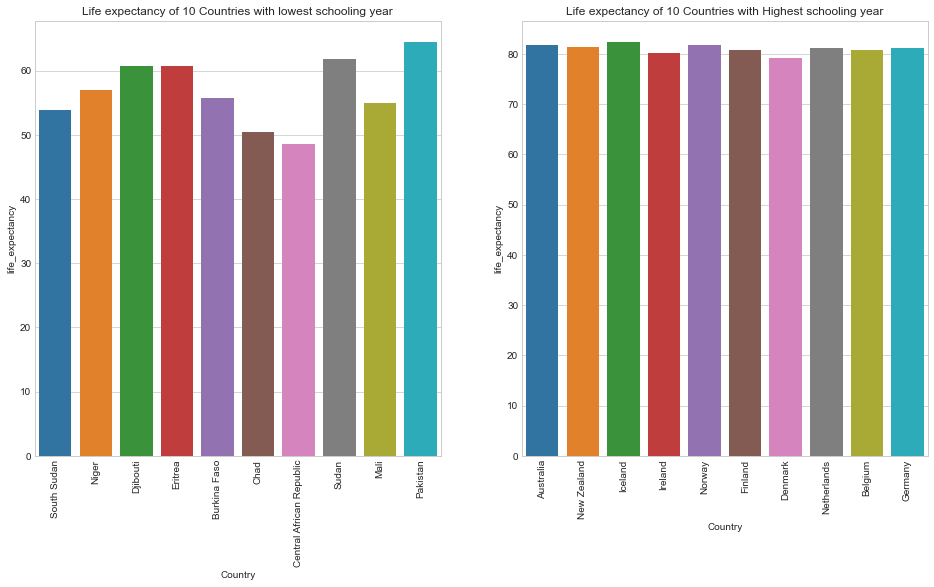

In [53]:
#Plotting Bar Graph for the countries with highest and lowest schooling duration and their life span
plt.subplot(1,2,1)
Least_schooling_plot = sb.barplot(data = Least_schooling, x=Least_schooling.Country, y=Least_schooling['life_expectancy'])
Least_schooling_plot.set_title("Life expectancy of 10 Countries with lowest schooling year")
Least_schooling_plot.set_xticklabels(Least_schooling_plot.get_xticklabels(), rotation = 90)


plt.subplot(1,2,2)
Highest_schooling_plot = sb.barplot(data = Highest_schooling, x=Highest_schooling.Country, y=Highest_schooling['life_expectancy'])
Highest_schooling_plot.set_title("Life expectancy of 10 Countries with Highest schooling year")
Highest_schooling_plot.set_xticklabels(Highest_schooling_plot.get_xticklabels(), rotation = 90)

plt.show()

In [54]:
#From the bar plots above and by taking the mean, we can say that the average Life Expectancy is more for the countries that have many years of schooling as compared to those that have very few schooling years

In [55]:
print(Least_schooling['life_expectancy'].mean()) #Avg life expectancy for 10 lowest schooling years countries
print(Highest_schooling['life_expectancy'].mean()) #Avg life expectancy for 10 highest schooling years countries


56.810625
81.049375


In [56]:
#2000-2015 dataset for 1st objective.

In [57]:
df.groupby("Year")[['Country', 'Year', 'Status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'hepatitis_b',
       'Measles ', 'under-five deaths ', 'Polio', 'total_expenditure',
       'Diphtheria', 'hiv/aids', 'GDP',
       'HDI', 'Schooling']].mean()

Year  life_expectancy  adult_mortality  infant_deaths   Alcohol  \
Year                                                                      
2000  2000.0        66.750273       181.475410      37.540984  4.545792   
2001  2001.0        67.128962       175.169399      36.825137  4.530820   
2002  2002.0        67.351366       171.437158      35.584699  4.635519   
2003  2003.0        67.433333       169.131148      34.874317  4.664918   
2004  2004.0        67.646448       186.262295      33.644809  4.727760   
2005  2005.0        68.209290       167.633880      32.366120  4.793552   
2006  2006.0        68.667760       170.404372      31.808743  4.890874   
2007  2007.0        69.036066       159.808743      30.612022  4.986721   
2008  2008.0        69.427869       174.519126      29.568306  4.979781   
2009  2009.0        69.938251       163.393443      28.956284  4.862568   
2010  2010.0        70.048634       161.863388      27.928962  4.916667   
2011  2011.0        70.654098       156.535519      26.830601  4.845082   
2012  2012.0        70.916940       148.792350      26.338798  4.115628   
2013  2013.0        71.236066       148.765027      25.278689  4.048962   
2014  2014.0        71.536612       148.688525      24.557377  3.253497   
2015  2015.0        71.616940       152.863388      23.803279  3.252842   

      percentage_expenditure  hepatitis_b     Measles   under-five deaths   \
Year                                                                         
2000              473.850781    62.040282  4663.792350           53.726776   
2001              516.625910    62.892741  4640.262295           52.038251   
2002              476.794487    66.881812  3204.754098           50.300546   
2003              494.706547    68.805310  3708.792350           48.584699   
2004              772.336156    72.614053  2805.497268           47.092896   
2005              823.318110    76.100392  3200.551913           45.306011   
2006              828.776319    77.652304  2063.224044           44.273224   
2007              954.458468    78.608588  1557.540984           42.732240   
2008             1095.802669    81.220610  1523.229508           41.322404   
2009              719.827424    82.504763  1522.606557           39.770492   
2010              768.221388    79.466512  1878.721311           38.546448   
2011             1029.534746    83.182359  1963.562842           36.918033   
2012             1011.471726    81.876348  1244.382514           35.562842   
2013              875.117774    83.045747  1534.666667           34.191257   
2014             1001.912550    83.073069  1831.207650           32.890710   
2015                2.383906    82.701485  1502.901639           31.612022   

          Polio  total_expenditure  Diphtheria  hiv/aids           GDP  \
Year                                                                     
2000  75.644809           5.617698   73.098361  2.530055   5030.763402   
2001  77.289617           5.631523   76.081967  2.573770   5156.710133   
2002  79.218579           5.717971   78.404372  2.573770   4940.536295   
2003  79.885246           5.843709   78.387978  2.546995   5089.211477   
2004  79.699454           5.874857   79.333333  2.478689   7036.353947   
2005  80.497268           5.935458   81.163934  2.345902   7201.643915   
2006  84.426230           5.717370   82.120219  2.169399   7284.541792   
2007  84.699454           5.650540   84.191257  1.992896   8299.147013   
2008  85.459016           5.741031   84.726776  1.797268  10061.006964   
2009  85.224044           6.533163   84.928962  1.538798   7040.382082   
2010  83.792350           6.162179   82.622951  1.273770   7384.667147   
2011  84.442623           5.987917   87.087432  1.092896   9278.337557   
2012  83.939891           6.243928   85.907104  0.926776   9802.541640   
2013  84.726776           6.282124   86.377049  0.779781   8118.597404   
2014  84.726776           6.194201   84.081967  0.681967   9528.0835

In [58]:
#Developing vs developed

In [59]:
life_year = df.groupby(by=['Year', 'Status']).mean().reset_index()
Developed = life_year.loc[life_year['Status'] == 'Developed',:]
Developing = life_year.loc[life_year['Status'] == 'Developing',:]
newdevelopedDF = life_year.loc[life_year['Status'] == 'Developed',:]
newdevelopingDF = life_year.loc[life_year['Status'] == 'Developing',:]

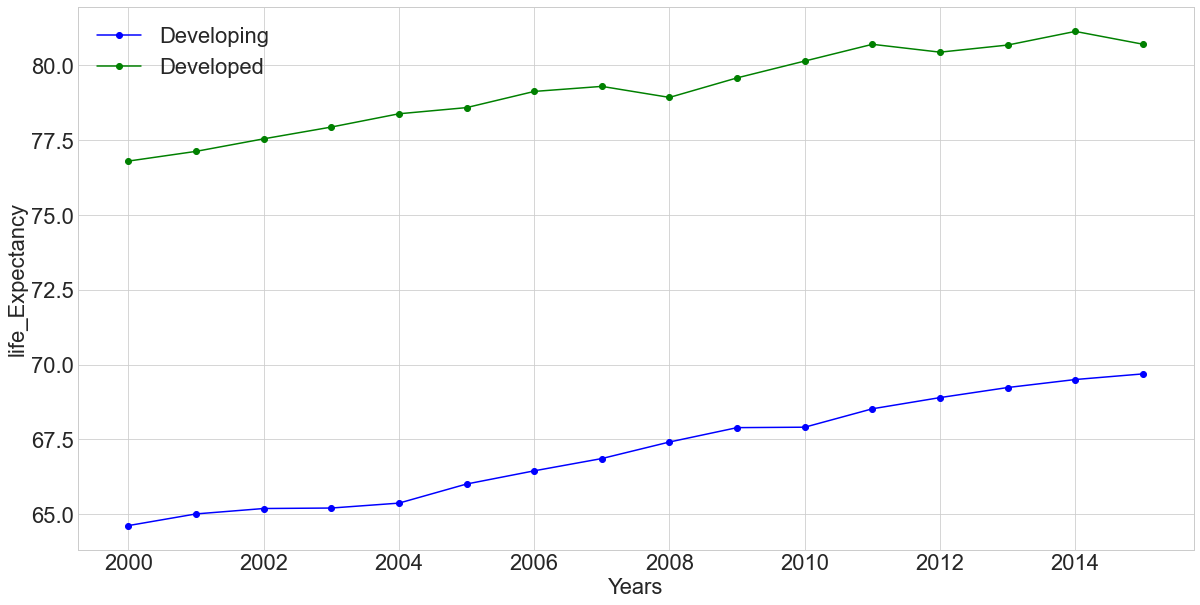

In [60]:
#plotting the line graph on the basis of life expectancy vs developing and developed countries from 2000-2015.
plt.figure(figsize = (20,10)) 
plt.rcParams.update({'font.size': 22})

plt.plot(newdevelopingDF.loc[:,'Year'], newdevelopingDF.loc[:,'life_expectancy'],color='blue',label='Developing',marker='o')
plt.plot(newdevelopedDF.loc[:,'Year'], newdevelopedDF.loc[:,'life_expectancy'],color='green',label='Developed',marker='o')
plt.title('')
plt.ylabel('life_Expectancy')
plt.xlabel('Years')
plt.legend()

In [61]:
#Linear Regression Model

In [62]:
newdf = df.drop(df.columns[[0, 2]], axis=1)

In [63]:
#Y axis is life expectancy. X axis is the featureset.
X = newdf.drop(['life_expectancy'],axis =1)
y = newdf['life_expectancy']

In [64]:
#Here we have split the dataset into training and testing

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [65]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


In [66]:
#As observed, the X_train and X_test are scaled in range 0-1
pd.DataFrame(X_train)
#Similarly we can observe for X_test.

0         1         2         3         4         5         6   \
0     0.466667  0.155125  0.000556  0.031355  0.004541  1.000000  0.000113   
1     0.933333  0.073407  0.000000  0.408175  0.058635  0.673469  0.000123   
2     0.666667  0.256233  0.000000  0.377940  0.029258  0.969388  0.000000   
3     0.000000  0.058172  0.051667  0.063270  0.002422  0.244898  0.034758   
4     0.266667  0.015235  0.000000  0.115342  0.000000  0.530612  0.000042   
...        ...       ...       ...       ...       ...       ...       ...   
2044  0.266667  0.450139  0.001111  0.065510  0.005443  0.244898  0.000335   
2045  0.800000  0.465374  0.001667  0.665174  0.077024  0.010204  0.005608   
2046  0.666667  0.295014  0.004444  0.000000  0.000429  0.642857  0.006089   
2047  0.000000  0.380886  0.001667  0.027436  0.002519  0.795918  0.000000   
2048  0.200000  0.353186  0.003333  0.330907  0.001090  0.775510  0.001937   

            7         8         9         10        11        12        13  \
0     0.000417  0.979167  0.119559  1.000000  0.000000  0.013679  0.794304   
1     0.000000  0.989583  0.670923  0.989691  0.000000  0.051110  0.955696   
2     0.000000  0.968750  0.318050  0.969072  0.001980  0.037513  0.738397   
3     0.056667  0.687500  0.336042  0.051546  0.239604  0.002384  0.306962   
4     0.000000  0.958333  0.479977  0.948454  0.000000  0.037064  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
2044  0.000833  0.635417  0.370865  0.639175  0.077228  0.007451  0.409283   
2045  0.001667  0.000000  0.210679  0.226804  0.160396  0.186213  0.614979   
2046  0.005000  0.510417  0.168891  0.639175  0.021782  0.001051  0.510549   
2047  0.001667  0.364583  0.167731  0.536082  0.000000  0.003633  0.000000   
2048  0.002500  1.000000  0.380731  0.979381  0.015842  0.001268  0.728903   

            14  
0     0.555556  
1     0.763285  
2     0.599034  
3     0.260870  
4     0.574879  
...        ...  
2044  0.178744  
2045  0.444444  
2046  0.367150  
2047  0.000000  
2048  0.690821  

[2049 rows x 15 columns]

In [67]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train Score: {:.4f}'.format(lreg.score(X_train, y_train)))
print('Test Score:{:.4f}'.format(lreg.score(X_test, y_test)))

Train Score: 0.8104
Test Score:0.8172


In [68]:
#To find size of array
np.where(X.columns == 'Schooling')

(array([14], dtype=int64),)

Text(0, 0.5, 'life_expectancy')

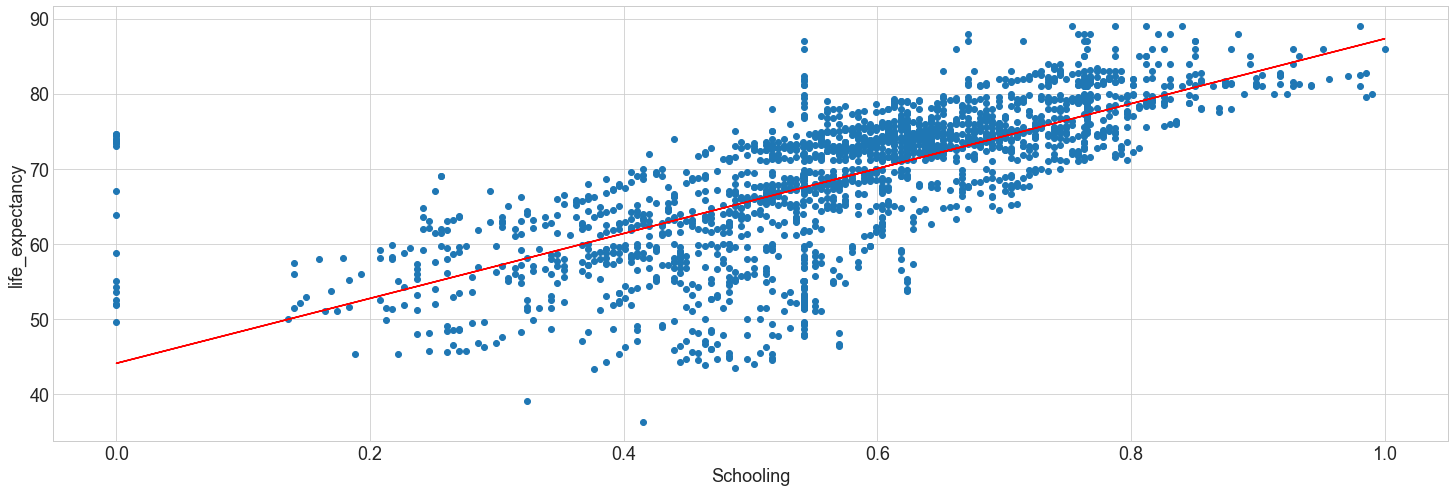

In [69]:
#plotting figure
%matplotlib inline
plt.rcParams.update({'font.size': 18})

X_train_sch = X_train[:,14].reshape(-1,1)
lreg.fit(X_train_sch, y_train)
Y_predict_lif_exp = lreg.predict(X_train_sch)

plt.subplots(figsize = (25,8))
plt.plot(X_train_sch, Y_predict_lif_exp, c = 'r')
plt.scatter(X_train_sch,y_train)
plt.xlabel('Schooling')
plt.ylabel('life_expectancy')

Text(0, 0.5, 'life_expectancy')

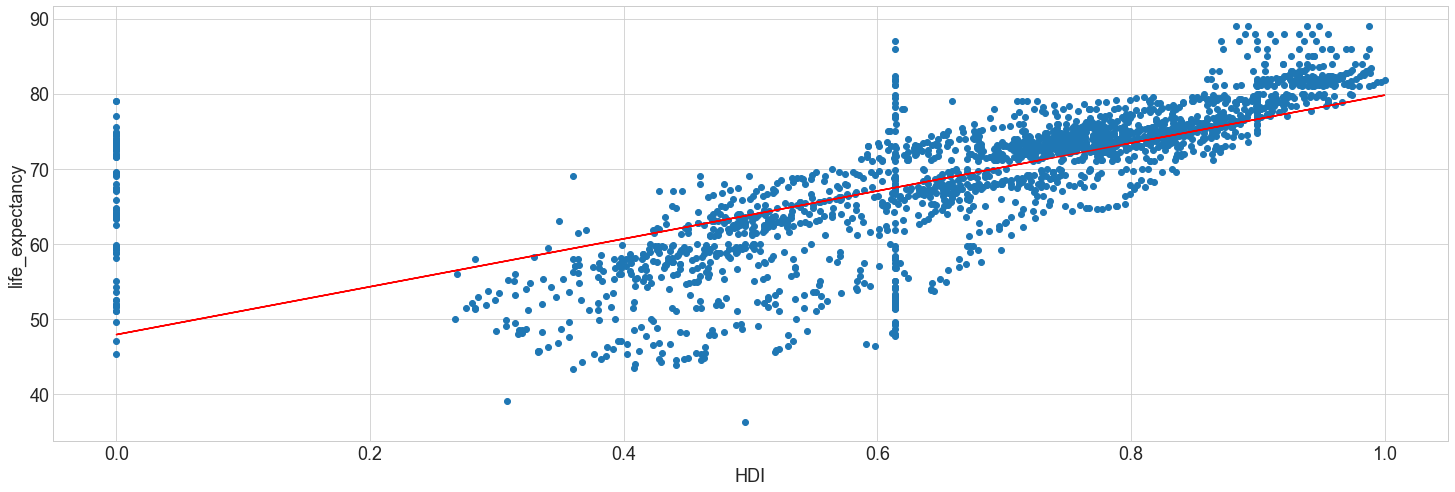

In [70]:
%matplotlib inline
plt.rcParams.update({'font.size': 18})

X_train_sch = X_train[:,13].reshape(-1,1)
lreg.fit(X_train_sch, y_train)
Y_predict_lif_exp = lreg.predict(X_train_sch)

plt.subplots(figsize = (25,8))
plt.plot(X_train_sch, Y_predict_lif_exp, c = 'r')
plt.scatter(X_train_sch,y_train)
plt.xlabel('HDI')
plt.ylabel('life_expectancy')

# Project Outcome

### Overview

Our project used various visualisation and cleaning techniques to analyse the WHO Life expectancy dataset which consisted of 2938 rows and 22 columns. Our findings show that there are certain parameters which have a direct or indirect impact on Life Expectancy. Some of the major parameters which had a direct link with life expectancy rate are Schooling duration and Indirect link such as Adult mortality, AIDS as seen in our visualisations. 



## Objective 1

### Explanation of Results

1)Analysation of life Expectancy of all the Countries in the period 2000-2015.

After analysis and operation, we found out that the Average life expectancy of the countries has increased. In the year 2000 the average life expectancy was 66.5 years, whereas in 2015 it rose sharply to 71.6 by 5.1 years. This shows a significant improvement in the countries' life expectancy rate. 

The increase in the life expectancy rate was possible only due to the collective rise in Schooling duration of the individuals, Total expenditure or spending of the government on healthcare systems, GDP, Income Composition and immunisation. The collaborative efforts of government bodies on healthcare systems and facilities have paved the way for medical institutions to provide quality treatment to patients with the help of sophisticated healthcare machinery and tools. Additionally, there was a significant increase in the average number of years that people spent on their education, which increased their capability to land a promising career and be financially stable to maintain a healthy lifestyle. 


### Visualisation


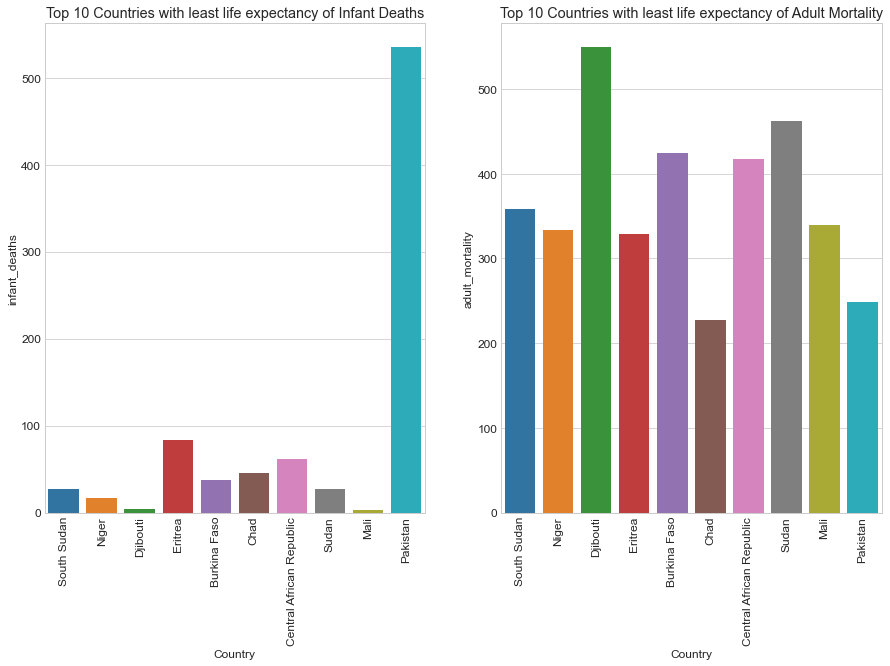

In [71]:
Least_Life_Expect = df.groupby('Country').mean().nsmallest(10, ['life_expectancy']).reset_index()

plt.figure(figsize=(15,9))
plt.rcParams.update({'font.size': 12})



plt.subplot(1,2,1)
Least_infant_life = sb.barplot(data = Least_Life_Expect, x=Least_Life_Expect.Country, y=Least_Life_Expect['infant_deaths'])
Least_infant_life.set_title("Top 10 Countries with least life expectancy of Infant Deaths")
Least_infant_life.set_xticklabels(Least_schooling_plot.get_xticklabels(), rotation = 90)




plt.subplot(1,2,2)
Least_adult_life = sb.barplot(data = Least_Life_Expect, x=Least_Life_Expect.Country, y=Least_Life_Expect['adult_mortality'])
Least_adult_life.set_title("Top 10 Countries with least life expectancy of Adult Mortality")
Least_adult_life.set_xticklabels(Least_schooling_plot.get_xticklabels(), rotation = 90)



plt.show()

## Objective 2
### Explanation of Results

2)Schooling's Impact on Life expectancy

From the analysis and operation of data, we can clearly see that the countries with children who undergo schooling for a longer duration have a higher life expectancy than the countries which do not. 
This isa because school education provides the basic knowledge of a healthy lifestyle and the care to be taken right from the beginning of their lives. It induces a sense of responsibility in the child or student to take care of their health and avoid unhealthy eating and drinking habits.
Further or higher education is also essential for a child as this helps them to attain their career goals so that they can be financially stable to be able to get nutritious food, live in a well-built house, and invest in good medical care and services. People with higher edcation use their knowledge, facts, and previous experiences to eliminate health-related risk factors and practice health-improving habits including quitting smoking, drinking alcohol, and exercising frequently.
Countries such as Congo, Finland, Australia, and the Netherlands, which have people with an average schooling duration of Eighteen and Seventeen years, respectively, have a higher life expectancy. It is because when a child advances or gets promoted to higher levels of education, they will learn or be taught more complex or advanced research on the healthcare system and why it works the way it works. It helps students understand the human body's basic working and care for their body and health independently.
There is a good relationship between an individual's mortality rate and the educational duration because a country with a proportion of individuals with a good schooling duration will automatically reduce the proportion of individuals with a low schooling duration, consequently increasing the overall health of the population and life expectancy. 


### Visualisation


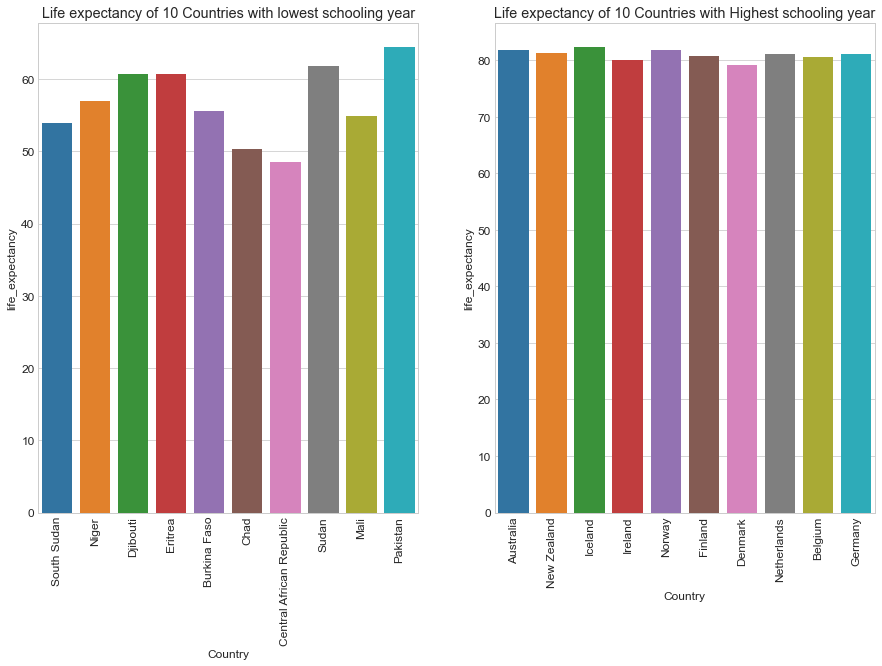

In [72]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(15,9))
plt.subplot(1,2,1)
Least_schooling_plot = sb.barplot(data = Least_schooling, x=Least_schooling.Country, y=Least_schooling['life_expectancy'])
Least_schooling_plot.set_title("Life expectancy of 10 Countries with lowest schooling year")
Least_schooling_plot.set_xticklabels(Least_schooling_plot.get_xticklabels(), rotation = 90)


plt.subplot(1,2,2)
Highest_schooling_plot = sb.barplot(data = Highest_schooling, x=Highest_schooling.Country, y=Highest_schooling['life_expectancy'])
Highest_schooling_plot.set_title("Life expectancy of 10 Countries with Highest schooling year")
Highest_schooling_plot.set_xticklabels(Highest_schooling_plot.get_xticklabels(), rotation = 90)

plt.show()

## Objective 3
### Explanation of Results

Although the average human life expectancy has improved worldwide, there is still a significant difference in average life expectancies between various countries.
After examining a nation's condition and life expectancy. The average life expectancy for the "Developed" column is 79 years. The average lifespan in emerging nations is 67 years. The findings show a 12-year increase in the life expectancy in developed nations. Developing countries could not spend more on the healthcare systems than the Total expenditure on healthcare systems by the developed countries.
The most serious development challenge our world currently faces is healthcare. Infectious disease outbreaks and other avoidable health problems are crippling nations all over the world. They must initially attend to their inhabitants' more urgent, immediate demands, which prevents them from focusing entirely on other development issues like education and economic sustainability. Without greater access to and availability of healthcare, global progress and the goal of international development will not be achievable.

### Visualisation


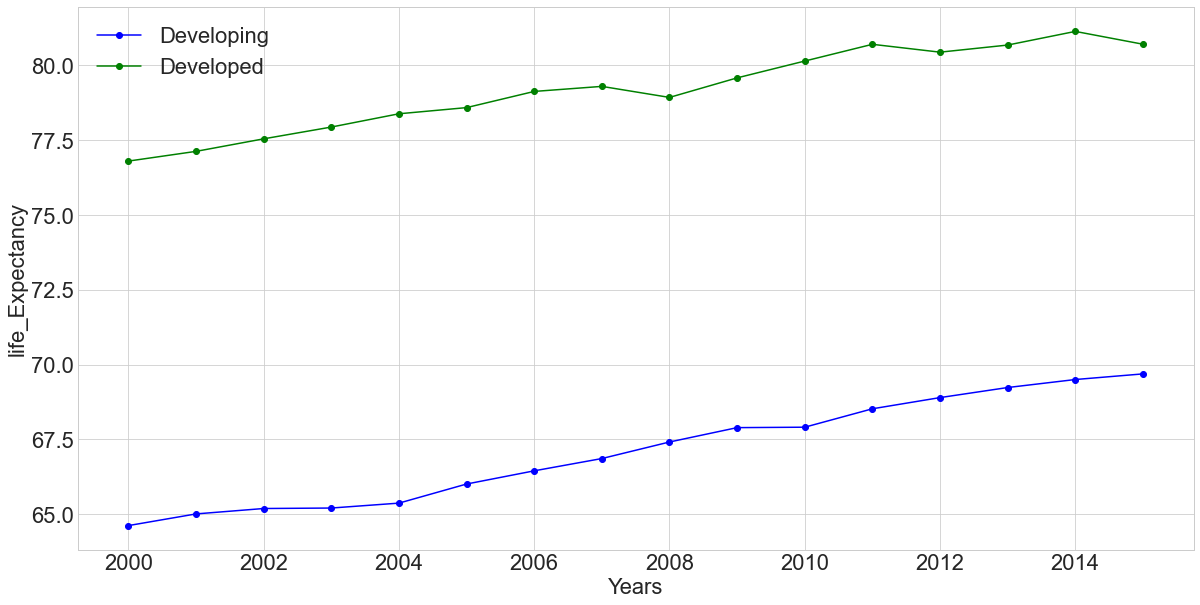

In [73]:
plt.figure(figsize = (20,10)) 
plt.rcParams.update({'font.size': 22})

plt.plot(newdevelopingDF.loc[:,'Year'], newdevelopingDF.loc[:,'life_expectancy'],color='blue',label='Developing',marker='o')
plt.plot(newdevelopedDF.loc[:,'Year'], newdevelopedDF.loc[:,'life_expectancy'],color='green',label='Developed',marker='o')
plt.title('')
plt.ylabel('life_Expectancy')
plt.xlabel('Years')
plt.legend()

## Objective 4 
### Explanation of Results

Linear regression

A linear regression model, which identifies the best-fit linear line between the independent and dependent variables, can ascertain the linear relationship between the dependent and independent variables.
In our case, it determines the relationship between life expectancy and education. We plotted the number of years spent in education versus the typical lifetime. There is undeniably an increasing linear trend, which means that the average life expectancy will rise as more years are spent in school. The red line shows the fit of a linear model. 
When examining life expectancy and the effects of pandemics over the course of a lifetime, WHO heavily depends on algorithms like the linear regression model.
Here we used simple linear regression model whih contains only one dependent and one independent variable. In our linear regression model, the x axis, which is the Schooling duration, is a dependent variable, and the Y-axis which is the Life expectancy, is the Independent variable. We can clearly see from the figure that schooling duration is strongly related to Life expectancy.

Additionally with the help of linear regression, we discovered that HDI(Human Development Index) has a positive impact on Life expectancy rate that means change life expectancy is directly proportional to change in HDI. This concludes that the official Government bodies should consider HDI and schooling to be an integral part in their overall country's growth not only in terms of Life expectancy but overall Nation's growth.


### Visualisation


Text(0, 0.5, 'life_expectancy')

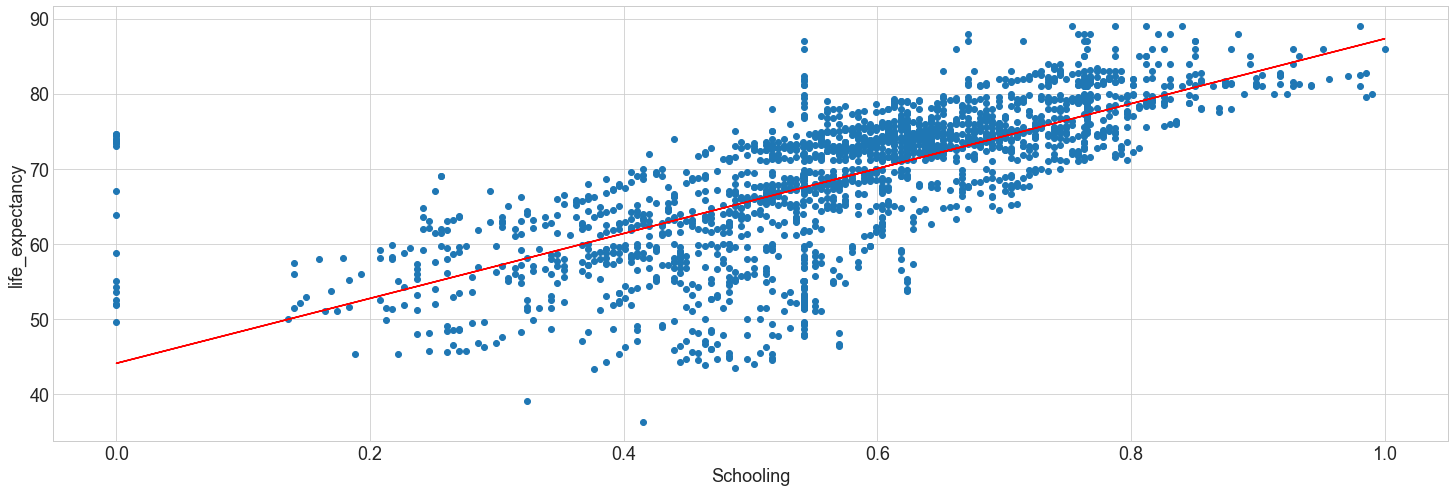

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

X_train_sch = X_train[:,14].reshape(-1,1)
lreg.fit(X_train_sch, y_train)
Y_predict_lif_exp = lreg.predict(X_train_sch)

plt.subplots(figsize = (25,8))
plt.plot(X_train_sch, Y_predict_lif_exp, c = 'r')
plt.scatter(X_train_sch,y_train)
plt.xlabel('Schooling')
plt.ylabel('life_expectancy')

In [75]:
np.where(X.columns == 'HDI')

(array([13], dtype=int64),)

Text(0, 0.5, 'life_expectancy')

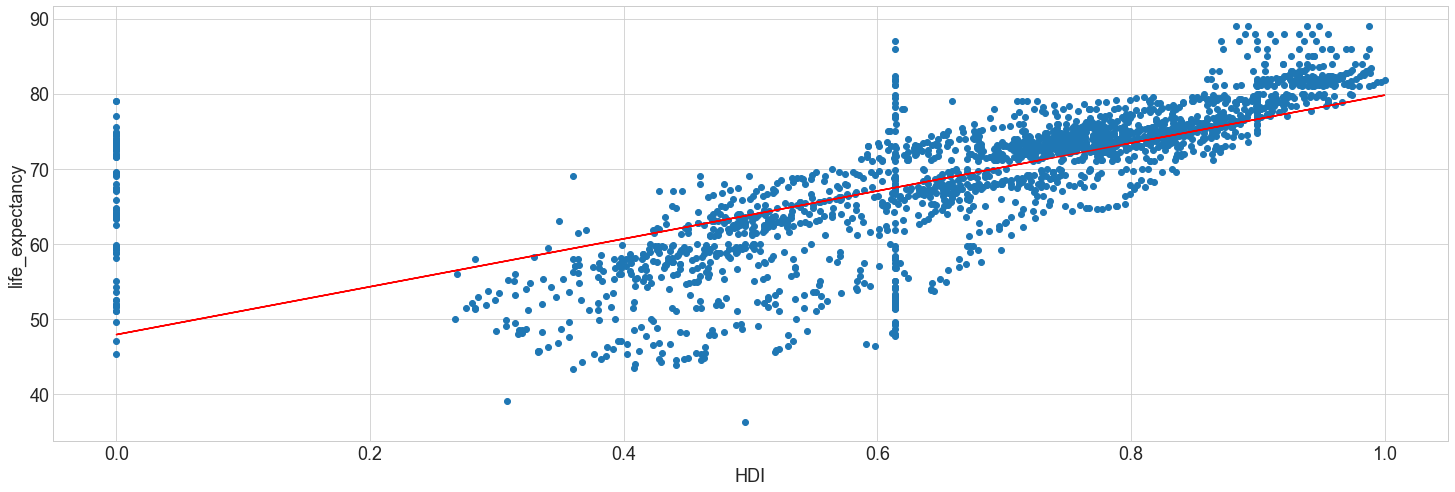

In [76]:
%matplotlib inline
plt.rcParams.update({'font.size': 18})

X_train_sch = X_train[:,13].reshape(-1,1)
lreg.fit(X_train_sch, y_train)
Y_predict_lif_exp = lreg.predict(X_train_sch)

plt.subplots(figsize = (25,8))
plt.plot(X_train_sch, Y_predict_lif_exp, c = 'r')
plt.scatter(X_train_sch,y_train)
plt.xlabel('HDI')
plt.ylabel('life_expectancy')

# Conclusion 

### Achievements

Our project successfully found out the life expectancy trend and factors affecting it. With the help of the pearson coefficient matrix we were able to identify the positively and negatively impacting factors on Life expectancy rate. For example from our analysis and operations on the dataset we found out that Schooling, Total expenditure etc and factors such as adult mortality, AIDS and population have negative relationship. This helps the medical and official bodies to better understand the reasons behind the change in life expectancy and take measures to improve it more. 


### Limitations

The globe has experienced a lot since 2015, and we were unable to work on the data beyond that year. Many nations were severely impacted by the COVID 19 epidemic in 2020 and the year after that. These impacts are still being felt today. The manufacturing of pharmaceuticals and the operation of healthcare institutions have undergone several modifications, as well as the addition of numerous rules and regulations. Because of COVID 19, many countries saw high death rates, particularly among senior citizens aged over 50. We are unsure if the life expectancy rate was affected by these extra parameters which were introduced and will only be known if the dataset is worked on after 2015.



### Future Work

As discussed in the limitations we would like to work on the dataset after 2015 and merge it with our current dataset and update the values in every parameter and add more factors if needed. This will help us to better understand not only the life expectancy rate of the countries but also how each country was affected by the pandemic interms of education, healthcare and socio economic factors.

